In [1]:
import pandas as pd
import numpy as np
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from tensorflow import keras
import tensorflow as tf

2022-11-20 21:09:30.219492: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
dataset = read_csv("folder/subfolder/dataToModel.csv",index_col= 0,sep=";")

In [3]:
dataset.head()

rok  ms  dz  godz  fco2_MQ  fco2_HQ  fco2_raw  glwody  T50cm  T2m  ...  \
0  2013   1   1   0.5     0.15      0.0      0.15     5.2    1.2  1.5  ...   
1  2013   1   1   1.5    -0.60      0.0     -0.60     5.2    0.9  1.2  ...   
2  2013   1   1   2.5     0.57      0.0      0.57     5.4    0.7  1.0  ...   
3  2013   1   1   3.5     0.03      0.0      0.03     5.5    0.3  0.6  ...   

    Ku     Ld     Lu    ppp    v   vdir  Tgrunt    vwc  PARd  PARu  
0  0.9  249.3  322.9  998.5  3.4  210.5     0.6  0.785   0.0   0.0  
1  1.0  249.5  323.5  998.1  3.3  202.5     0.6  0.785   0.0   0.0  
2  1.0  249.7  324.0  997.6  3.3  201.6     0.6  0.785   0.0   0.0  
3  0.9  250.0  324.5  997.2  2.6  191.6     0.6  0.785   0.0   0.0  

[4 rows x 21 columns]

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40342 entries, 0 to 40341
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rok       40342 non-null  int64  
 1   ms        40342 non-null  int64  
 2   dz        40342 non-null  int64  
 3   godz      40342 non-null  float64
 4   fco2_MQ   23815 non-null  float64
 5   fco2_HQ   40342 non-null  float64
 6   fco2_raw  40342 non-null  float64
 7   glwody    40342 non-null  float64
 8   T50cm     40342 non-null  float64
 9   T2m       40342 non-null  float64
 10  Kd        40342 non-null  float64
 11  Ku        40342 non-null  float64
 12  Ld        40342 non-null  float64
 13  Lu        40342 non-null  float64
 14  ppp       40342 non-null  float64
 15  v         40342 non-null  float64
 16  vdir      40342 non-null  float64
 17  Tgrunt    40342 non-null  float64
 18  vwc       40342 non-null  float64
 19  PARd      40342 non-null  float64
 20  PARu      40342 non-null  fl

In [5]:
dataset.drop(columns  = ['dz','godz','ms','fco2_MQ','rok','T50cm','T2m','v','vdir','Tgrunt','vwc','PARd','PARu',"Ku",'Lu'], inplace = True)
#dataset.drop(columns  = ['dz','godz','ms','fco2_MQ','rok'], inplace = True)
#dataset.drop(columns  = [ 'fMOD_NN', 'fMOD_E0', 'fMODlut', 'fMODsrr','dz','godz','ms','fco2_MQ'], inplace = True)

In [6]:
dataset.head()

fco2_HQ  fco2_raw  glwody   Kd     Ld    ppp
0      0.0      0.15     5.2  0.0  249.3  998.5
1      0.0     -0.60     5.2  0.0  249.5  998.1
2      0.0      0.57     5.4  0.0  249.7  997.6
3      0.0      0.03     5.5  0.0  250.0  997.2
4      0.0      0.03     5.5  0.0  250.2  996.8

In [7]:
dataset.drop(columns =[] , inplace = True)

In [8]:
#final dataset
dataset.head(2220)

fco2_HQ  fco2_raw  glwody     Kd     Ld     ppp
0         0.0      0.15     5.2    0.0  249.3   998.5
1         0.0     -0.60     5.2    0.0  249.5   998.1
2         0.0      0.57     5.4    0.0  249.7   997.6
3         0.0      0.03     5.5    0.0  250.0   997.2
4         0.0      0.03     5.5    0.0  250.2   996.8
...       ...       ...     ...    ...    ...     ...
2215      1.0     -5.00     3.6  665.8  327.0  1001.2
2216      1.0     -6.26     3.4  770.0  332.4  1000.9
2217      1.0     -0.04     3.2  841.9  337.6  1000.9
2218      0.0     -2.90     3.1  876.3  340.0  1000.7
2219      0.0     -5.18     3.2  856.8  344.3  1000.6

[2220 rows x 6 columns]

In [9]:
values = dataset.values
# ensure all data is float
values = values.astype('float64')

In [10]:
# normalizing input features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
scaled =pd.DataFrame(scaled)

In [11]:
scaled.head(2220)

0         1         2         3         4         5
0     0.0  0.518109  0.869646  0.000000  0.334327  0.535762
1     0.0  0.517643  0.869646  0.000000  0.334990  0.530364
2     0.0  0.518370  0.871508  0.000000  0.335653  0.523617
3     0.0  0.518034  0.872439  0.000000  0.336647  0.518219
4     0.0  0.518034  0.872439  0.000000  0.337309  0.512821
...   ...       ...       ...       ...       ...       ...
2215  1.0  0.514905  0.854749  0.669213  0.591783  0.572200
2216  1.0  0.514121  0.852886  0.773947  0.609675  0.568151
2217  1.0  0.517991  0.851024  0.846216  0.626905  0.568151
2218  0.0  0.516212  0.850093  0.880792  0.634858  0.565452
2219  0.0  0.514793  0.851024  0.861192  0.649105  0.564103

[2220 rows x 6 columns]

In [12]:
#def create_ts_data(dataset, lookback=1, predicted_col=0):
    #temp=dataset.copy()
    #temp["id"]= range(1, len(temp)+1)
    #temp = temp.iloc[:-lookback, :]
    #temp.set_index('id', inplace =True)
    #predicted_value=dataset.copy()
    #predicted_value = predicted_value.iloc[lookback:,predicted_col]
    #predicted_value.columns=["Predcited"]
    #predicted_value= pd.DataFrame(predicted_value)
    
    #predicted_value["id"]= range(1, len(predicted_value)+1)
    #predicted_value.set_index('id', inplace =True)
    #final_df= pd.concat([temp, predicted_value], axis=1)
    ##final_df.columns = ['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)', 'var6(t-1)', 'var7(t-1)', 'var8(t-1)','var1(t)']
    ##final_df.set_index('Date', inplace=True)
    #return final_df

In [13]:
#We now create the time series dataset with looking back one time step

#reframed_df= create_ts_data(scaled, 1,0)

#reframed_df.fillna(0, inplace=True)
#reframed_df.columns = ['var1(t-1)', 'var2(t-1)', 'var3(t-1)',  'var5(t-1)','var6(t-1)','var7(t-1)','var8(t-1)','var9(t-1)','var10(t-1)','var11(t-1)','var12(t-1)','var13(t-1)','var14(t-1)','var15(t-1)','var16(t-1)','var17(t-1)','var18(t-1)']
#reframed_df.columns = ['var1(t-1)', 'var2(t-1)', 'var3(t-1)','var4(t-1)']
#print(reframed_df.head(4))

In [14]:
# split into train and test sets
#values = reframed_df.values

#training_sample =int( len(dataset) *0.8)
#testDataset=DataFrame.to_numpy(dataset)
#testDataset=DataFrame.to_numpy(reframed_df)
#print(testDataset)

In [15]:
#print(testDataset.shape)

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40342 entries, 0 to 40341
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fco2_HQ   40342 non-null  float64
 1   fco2_raw  40342 non-null  float64
 2   glwody    40342 non-null  float64
 3   Kd        40342 non-null  float64
 4   Ld        40342 non-null  float64
 5   ppp       40342 non-null  float64
dtypes: float64(6)
memory usage: 2.2 MB


In [17]:
dataset.shape

(40342, 6)

In [18]:
list0 = []
list1 = []
i=0
#agroup=0
#list1.append(0)
#for window in dataset.rolling(window=3):
for window in scaled.rolling(window=3):
    #print(window)
    print(window.shape)
   
    if(window.shape==(3,window.shape[1])):
        i+=1
        print("XD "+ str(i))
        list0.append(np.asarray(window.copy()))
        y=0
        shape = window.shape
        #print(window[0])
      
        #for test in range(shape[0]) :
        for index, test in window.iterrows() :
            print(y)
            if (y==2) :
                print(test[0])
                list1.append(test[0])
                agroup=test[0]
            y+=1
       # for index2, test2 in window.iterrows() :
        #    test2[0]=agroup
         #   print(test2[0])
            
        
        

#list1.append(0)

(1, 6)
(2, 6)
(3, 6)
XD 1
0
1
2
0.0
(3, 6)
XD 2
0
1
2
0.0
(3, 6)
XD 3
0
1
2
0.0
(3, 6)
XD 4
0
1
2
0.0
(3, 6)
XD 5
0
1
2
0.0
(3, 6)
XD 6
0
1
2
0.0
(3, 6)
XD 7
0
1
2
0.0
(3, 6)
XD 8
0
1
2
0.0
(3, 6)
XD 9
0
1
2
0.0
(3, 6)
XD 10
0
1
2
0.0
(3, 6)
XD 11
0
1
2
0.0
(3, 6)
XD 12
0
1
2
0.0
(3, 6)
XD 13
0
1
2
0.0
(3, 6)
XD 14
0
1
2
0.0
(3, 6)
XD 15
0
1
2
0.0
(3, 6)
XD 16
0
1
2
0.0
(3, 6)
XD 17
0
1
2
0.0
(3, 6)
XD 18
0
1
2
0.0
(3, 6)
XD 19
0
1
2
0.0
(3, 6)
XD 20
0
1
2
0.0
(3, 6)
XD 21
0
1
2
0.0
(3, 6)
XD 22
0
1
2
0.0
(3, 6)
XD 23
0
1
2
0.0
(3, 6)
XD 24
0
1
2
0.0
(3, 6)
XD 25
0
1
2
0.0
(3, 6)
XD 26
0
1
2
0.0
(3, 6)
XD 27
0
1
2
0.0
(3, 6)
XD 28
0
1
2
0.0
(3, 6)
XD 29
0
1
2
0.0
(3, 6)
XD 30
0
1
2
0.0
(3, 6)
XD 31
0
1
2
0.0
(3, 6)
XD 32
0
1
2
0.0
(3, 6)
XD 33
0
1
2
0.0
(3, 6)
XD 34
0
1
2
0.0
(3, 6)
XD 35
0
1
2
0.0
(3, 6)
XD 36
0
1
2
0.0
(3, 6)
XD 37
0
1
2
0.0
(3, 6)
XD 38
0
1
2
0.0
(3, 6)
XD 39
0
1
2
0.0
(3, 6)
XD 40
0
1
2
0.0
(3, 6)
XD 41
0
1
2
0.0
(3, 6)
XD 42
0
1
2
0.0
(3, 6)
XD 43
0
1
2
0.0
(3, 6)

0
1
2
0.0
(3, 6)
XD 495
0
1
2
0.0
(3, 6)
XD 496
0
1
2
0.0
(3, 6)
XD 497
0
1
2
0.0
(3, 6)
XD 498
0
1
2
0.0
(3, 6)
XD 499
0
1
2
0.0
(3, 6)
XD 500
0
1
2
0.0
(3, 6)
XD 501
0
1
2
0.0
(3, 6)
XD 502
0
1
2
0.0
(3, 6)
XD 503
0
1
2
0.0
(3, 6)
XD 504
0
1
2
0.0
(3, 6)
XD 505
0
1
2
0.0
(3, 6)
XD 506
0
1
2
0.0
(3, 6)
XD 507
0
1
2
0.0
(3, 6)
XD 508
0
1
2
0.0
(3, 6)
XD 509
0
1
2
0.0
(3, 6)
XD 510
0
1
2
0.0
(3, 6)
XD 511
0
1
2
0.0
(3, 6)
XD 512
0
1
2
0.0
(3, 6)
XD 513
0
1
2
0.0
(3, 6)
XD 514
0
1
2
0.0
(3, 6)
XD 515
0
1
2
0.0
(3, 6)
XD 516
0
1
2
0.0
(3, 6)
XD 517
0
1
2
0.0
(3, 6)
XD 518
0
1
2
0.0
(3, 6)
XD 519
0
1
2
0.0
(3, 6)
XD 520
0
1
2
0.0
(3, 6)
XD 521
0
1
2
0.0
(3, 6)
XD 522
0
1
2
0.0
(3, 6)
XD 523
0
1
2
0.0
(3, 6)
XD 524
0
1
2
0.0
(3, 6)
XD 525
0
1
2
0.0
(3, 6)
XD 526
0
1
2
0.0
(3, 6)
XD 527
0
1
2
0.0
(3, 6)
XD 528
0
1
2
0.0
(3, 6)
XD 529
0
1
2
0.0
(3, 6)
XD 530
0
1
2
0.0
(3, 6)
XD 531
0
1
2
0.0
(3, 6)
XD 532
0
1
2
0.0
(3, 6)
XD 533
0
1
2
0.0
(3, 6)
XD 534
0
1
2
0.0
(3, 6)
XD 535
0
1
2
0.0
(3, 6)

0
1
2
0.0
(3, 6)
XD 924
0
1
2
0.0
(3, 6)
XD 925
0
1
2
0.0
(3, 6)
XD 926
0
1
2
0.0
(3, 6)
XD 927
0
1
2
0.0
(3, 6)
XD 928
0
1
2
0.0
(3, 6)
XD 929
0
1
2
0.0
(3, 6)
XD 930
0
1
2
0.0
(3, 6)
XD 931
0
1
2
0.0
(3, 6)
XD 932
0
1
2
0.0
(3, 6)
XD 933
0
1
2
0.0
(3, 6)
XD 934
0
1
2
0.0
(3, 6)
XD 935
0
1
2
0.0
(3, 6)
XD 936
0
1
2
0.0
(3, 6)
XD 937
0
1
2
0.0
(3, 6)
XD 938
0
1
2
0.0
(3, 6)
XD 939
0
1
2
0.0
(3, 6)
XD 940
0
1
2
0.0
(3, 6)
XD 941
0
1
2
0.0
(3, 6)
XD 942
0
1
2
0.0
(3, 6)
XD 943
0
1
2
0.0
(3, 6)
XD 944
0
1
2
0.0
(3, 6)
XD 945
0
1
2
0.0
(3, 6)
XD 946
0
1
2
0.0
(3, 6)
XD 947
0
1
2
0.0
(3, 6)
XD 948
0
1
2
0.0
(3, 6)
XD 949
0
1
2
0.0
(3, 6)
XD 950
0
1
2
0.0
(3, 6)
XD 951
0
1
2
0.0
(3, 6)
XD 952
0
1
2
0.0
(3, 6)
XD 953
0
1
2
0.0
(3, 6)
XD 954
0
1
2
0.0
(3, 6)
XD 955
0
1
2
0.0
(3, 6)
XD 956
0
1
2
0.0
(3, 6)
XD 957
0
1
2
0.0
(3, 6)
XD 958
0
1
2
0.0
(3, 6)
XD 959
0
1
2
0.0
(3, 6)
XD 960
0
1
2
0.0
(3, 6)
XD 961
0
1
2
0.0
(3, 6)
XD 962
0
1
2
0.0
(3, 6)
XD 963
0
1
2
0.0
(3, 6)
XD 964
0
1
2
0.0
(3, 6)

0
1
2
0.0
(3, 6)
XD 1588
0
1
2
1.0
(3, 6)
XD 1589
0
1
2
0.0
(3, 6)
XD 1590
0
1
2
0.0
(3, 6)
XD 1591
0
1
2
1.0
(3, 6)
XD 1592
0
1
2
1.0
(3, 6)
XD 1593
0
1
2
0.0
(3, 6)
XD 1594
0
1
2
0.0
(3, 6)
XD 1595
0
1
2
0.0
(3, 6)
XD 1596
0
1
2
0.0
(3, 6)
XD 1597
0
1
2
0.0
(3, 6)
XD 1598
0
1
2
0.0
(3, 6)
XD 1599
0
1
2
0.0
(3, 6)
XD 1600
0
1
2
0.0
(3, 6)
XD 1601
0
1
2
0.0
(3, 6)
XD 1602
0
1
2
0.0
(3, 6)
XD 1603
0
1
2
1.0
(3, 6)
XD 1604
0
1
2
1.0
(3, 6)
XD 1605
0
1
2
1.0
(3, 6)
XD 1606
0
1
2
1.0
(3, 6)
XD 1607
0
1
2
0.0
(3, 6)
XD 1608
0
1
2
0.0
(3, 6)
XD 1609
0
1
2
0.0
(3, 6)
XD 1610
0
1
2
0.0
(3, 6)
XD 1611
0
1
2
1.0
(3, 6)
XD 1612
0
1
2
1.0
(3, 6)
XD 1613
0
1
2
0.0
(3, 6)
XD 1614
0
1
2
0.0
(3, 6)
XD 1615
0
1
2
1.0
(3, 6)
XD 1616
0
1
2
1.0
(3, 6)
XD 1617
0
1
2
0.0
(3, 6)
XD 1618
0
1
2
0.0
(3, 6)
XD 1619
0
1
2
1.0
(3, 6)
XD 1620
0
1
2
1.0
(3, 6)
XD 1621
0
1
2
1.0
(3, 6)
XD 1622
0
1
2
1.0
(3, 6)
XD 1623
0
1
2
1.0
(3, 6)
XD 1624
0
1
2
1.0
(3, 6)
XD 1625
0
1
2
0.0
(3, 6)
XD 1626
0
1
2
1.0
(3, 6)
XD 1627


0
1
2
0.0
(3, 6)
XD 2017
0
1
2
0.0
(3, 6)
XD 2018
0
1
2
1.0
(3, 6)
XD 2019
0
1
2
0.0
(3, 6)
XD 2020
0
1
2
0.0
(3, 6)
XD 2021
0
1
2
0.0
(3, 6)
XD 2022
0
1
2
0.0
(3, 6)
XD 2023
0
1
2
0.0
(3, 6)
XD 2024
0
1
2
0.0
(3, 6)
XD 2025
0
1
2
0.0
(3, 6)
XD 2026
0
1
2
1.0
(3, 6)
XD 2027
0
1
2
1.0
(3, 6)
XD 2028
0
1
2
0.0
(3, 6)
XD 2029
0
1
2
0.0
(3, 6)
XD 2030
0
1
2
0.0
(3, 6)
XD 2031
0
1
2
0.0
(3, 6)
XD 2032
0
1
2
0.0
(3, 6)
XD 2033
0
1
2
0.0
(3, 6)
XD 2034
0
1
2
1.0
(3, 6)
XD 2035
0
1
2
0.0
(3, 6)
XD 2036
0
1
2
0.0
(3, 6)
XD 2037
0
1
2
1.0
(3, 6)
XD 2038
0
1
2
1.0
(3, 6)
XD 2039
0
1
2
0.0
(3, 6)
XD 2040
0
1
2
0.0
(3, 6)
XD 2041
0
1
2
0.0
(3, 6)
XD 2042
0
1
2
0.0
(3, 6)
XD 2043
0
1
2
0.0
(3, 6)
XD 2044
0
1
2
0.0
(3, 6)
XD 2045
0
1
2
0.0
(3, 6)
XD 2046
0
1
2
1.0
(3, 6)
XD 2047
0
1
2
1.0
(3, 6)
XD 2048
0
1
2
1.0
(3, 6)
XD 2049
0
1
2
1.0
(3, 6)
XD 2050
0
1
2
1.0
(3, 6)
XD 2051
0
1
2
1.0
(3, 6)
XD 2052
0
1
2
1.0
(3, 6)
XD 2053
0
1
2
1.0
(3, 6)
XD 2054
0
1
2
0.0
(3, 6)
XD 2055
0
1
2
1.0
(3, 6)
XD 2056


0
1
2
0.0
(3, 6)
XD 2358
0
1
2
1.0
(3, 6)
XD 2359
0
1
2
0.0
(3, 6)
XD 2360
0
1
2
0.0
(3, 6)
XD 2361
0
1
2
0.0
(3, 6)
XD 2362
0
1
2
0.0
(3, 6)
XD 2363
0
1
2
0.0
(3, 6)
XD 2364
0
1
2
0.0
(3, 6)
XD 2365
0
1
2
0.0
(3, 6)
XD 2366
0
1
2
0.0
(3, 6)
XD 2367
0
1
2
0.0
(3, 6)
XD 2368
0
1
2
0.0
(3, 6)
XD 2369
0
1
2
0.0
(3, 6)
XD 2370
0
1
2
1.0
(3, 6)
XD 2371
0
1
2
1.0
(3, 6)
XD 2372
0
1
2
0.0
(3, 6)
XD 2373
0
1
2
0.0
(3, 6)
XD 2374
0
1
2
0.0
(3, 6)
XD 2375
0
1
2
1.0
(3, 6)
XD 2376
0
1
2
1.0
(3, 6)
XD 2377
0
1
2
0.0
(3, 6)
XD 2378
0
1
2
0.0
(3, 6)
XD 2379
0
1
2
1.0
(3, 6)
XD 2380
0
1
2
1.0
(3, 6)
XD 2381
0
1
2
1.0
(3, 6)
XD 2382
0
1
2
1.0
(3, 6)
XD 2383
0
1
2
0.0
(3, 6)
XD 2384
0
1
2
1.0
(3, 6)
XD 2385
0
1
2
1.0
(3, 6)
XD 2386
0
1
2
1.0
(3, 6)
XD 2387
0
1
2
0.0
(3, 6)
XD 2388
0
1
2
1.0
(3, 6)
XD 2389
0
1
2
0.0
(3, 6)
XD 2390
0
1
2
1.0
(3, 6)
XD 2391
0
1
2
0.0
(3, 6)
XD 2392
0
1
2
0.0
(3, 6)
XD 2393
0
1
2
0.0
(3, 6)
XD 2394
0
1
2
0.0
(3, 6)
XD 2395
0
1
2
0.0
(3, 6)
XD 2396
0
1
2
0.0
(3, 6)
XD 2397


0
1
2
0.0
(3, 6)
XD 2701
0
1
2
1.0
(3, 6)
XD 2702
0
1
2
0.0
(3, 6)
XD 2703
0
1
2
0.0
(3, 6)
XD 2704
0
1
2
0.0
(3, 6)
XD 2705
0
1
2
0.0
(3, 6)
XD 2706
0
1
2
0.0
(3, 6)
XD 2707
0
1
2
0.0
(3, 6)
XD 2708
0
1
2
0.0
(3, 6)
XD 2709
0
1
2
0.0
(3, 6)
XD 2710
0
1
2
0.0
(3, 6)
XD 2711
0
1
2
0.0
(3, 6)
XD 2712
0
1
2
0.0
(3, 6)
XD 2713
0
1
2
0.0
(3, 6)
XD 2714
0
1
2
0.0
(3, 6)
XD 2715
0
1
2
1.0
(3, 6)
XD 2716
0
1
2
0.0
(3, 6)
XD 2717
0
1
2
1.0
(3, 6)
XD 2718
0
1
2
0.0
(3, 6)
XD 2719
0
1
2
0.0
(3, 6)
XD 2720
0
1
2
0.0
(3, 6)
XD 2721
0
1
2
0.0
(3, 6)
XD 2722
0
1
2
0.0
(3, 6)
XD 2723
0
1
2
1.0
(3, 6)
XD 2724
0
1
2
1.0
(3, 6)
XD 2725
0
1
2
1.0
(3, 6)
XD 2726
0
1
2
0.0
(3, 6)
XD 2727
0
1
2
0.0
(3, 6)
XD 2728
0
1
2
0.0
(3, 6)
XD 2729
0
1
2
0.0
(3, 6)
XD 2730
0
1
2
0.0
(3, 6)
XD 2731
0
1
2
0.0
(3, 6)
XD 2732
0
1
2
0.0
(3, 6)
XD 2733
0
1
2
0.0
(3, 6)
XD 2734
0
1
2
0.0
(3, 6)
XD 2735
0
1
2
0.0
(3, 6)
XD 2736
0
1
2
0.0
(3, 6)
XD 2737
0
1
2
0.0
(3, 6)
XD 2738
0
1
2
0.0
(3, 6)
XD 2739
0
1
2
0.0
(3, 6)
XD 2740


0
1
2
0.0
(3, 6)
XD 3266
0
1
2
0.0
(3, 6)
XD 3267
0
1
2
0.0
(3, 6)
XD 3268
0
1
2
0.0
(3, 6)
XD 3269
0
1
2
0.0
(3, 6)
XD 3270
0
1
2
0.0
(3, 6)
XD 3271
0
1
2
0.0
(3, 6)
XD 3272
0
1
2
0.0
(3, 6)
XD 3273
0
1
2
0.0
(3, 6)
XD 3274
0
1
2
0.0
(3, 6)
XD 3275
0
1
2
0.0
(3, 6)
XD 3276
0
1
2
0.0
(3, 6)
XD 3277
0
1
2
1.0
(3, 6)
XD 3278
0
1
2
1.0
(3, 6)
XD 3279
0
1
2
1.0
(3, 6)
XD 3280
0
1
2
1.0
(3, 6)
XD 3281
0
1
2
1.0
(3, 6)
XD 3282
0
1
2
1.0
(3, 6)
XD 3283
0
1
2
1.0
(3, 6)
XD 3284
0
1
2
1.0
(3, 6)
XD 3285
0
1
2
1.0
(3, 6)
XD 3286
0
1
2
0.0
(3, 6)
XD 3287
0
1
2
0.0
(3, 6)
XD 3288
0
1
2
0.0
(3, 6)
XD 3289
0
1
2
0.0
(3, 6)
XD 3290
0
1
2
0.0
(3, 6)
XD 3291
0
1
2
0.0
(3, 6)
XD 3292
0
1
2
0.0
(3, 6)
XD 3293
0
1
2
0.0
(3, 6)
XD 3294
0
1
2
0.0
(3, 6)
XD 3295
0
1
2
0.0
(3, 6)
XD 3296
0
1
2
0.0
(3, 6)
XD 3297
0
1
2
0.0
(3, 6)
XD 3298
0
1
2
0.0
(3, 6)
XD 3299
0
1
2
0.0
(3, 6)
XD 3300
0
1
2
1.0
(3, 6)
XD 3301
0
1
2
1.0
(3, 6)
XD 3302
0
1
2
1.0
(3, 6)
XD 3303
0
1
2
1.0
(3, 6)
XD 3304
0
1
2
1.0
(3, 6)
XD 3305


0
1
2
0.0
(3, 6)
XD 3742
0
1
2
0.0
(3, 6)
XD 3743
0
1
2
0.0
(3, 6)
XD 3744
0
1
2
0.0
(3, 6)
XD 3745
0
1
2
0.0
(3, 6)
XD 3746
0
1
2
1.0
(3, 6)
XD 3747
0
1
2
0.0
(3, 6)
XD 3748
0
1
2
0.0
(3, 6)
XD 3749
0
1
2
0.0
(3, 6)
XD 3750
0
1
2
1.0
(3, 6)
XD 3751
0
1
2
0.0
(3, 6)
XD 3752
0
1
2
0.0
(3, 6)
XD 3753
0
1
2
0.0
(3, 6)
XD 3754
0
1
2
0.0
(3, 6)
XD 3755
0
1
2
1.0
(3, 6)
XD 3756
0
1
2
1.0
(3, 6)
XD 3757
0
1
2
1.0
(3, 6)
XD 3758
0
1
2
1.0
(3, 6)
XD 3759
0
1
2
0.0
(3, 6)
XD 3760
0
1
2
0.0
(3, 6)
XD 3761
0
1
2
1.0
(3, 6)
XD 3762
0
1
2
1.0
(3, 6)
XD 3763
0
1
2
1.0
(3, 6)
XD 3764
0
1
2
1.0
(3, 6)
XD 3765
0
1
2
0.0
(3, 6)
XD 3766
0
1
2
0.0
(3, 6)
XD 3767
0
1
2
0.0
(3, 6)
XD 3768
0
1
2
1.0
(3, 6)
XD 3769
0
1
2
1.0
(3, 6)
XD 3770
0
1
2
1.0
(3, 6)
XD 3771
0
1
2
0.0
(3, 6)
XD 3772
0
1
2
0.0
(3, 6)
XD 3773
0
1
2
0.0
(3, 6)
XD 3774
0
1
2
0.0
(3, 6)
XD 3775
0
1
2
0.0
(3, 6)
XD 3776
0
1
2
0.0
(3, 6)
XD 3777
0
1
2
1.0
(3, 6)
XD 3778
0
1
2
0.0
(3, 6)
XD 3779
0
1
2
1.0
(3, 6)
XD 3780
0
1
2
1.0
(3, 6)
XD 3781


1
2
0.0
(3, 6)
XD 4368
0
1
2
0.0
(3, 6)
XD 4369
0
1
2
0.0
(3, 6)
XD 4370
0
1
2
0.0
(3, 6)
XD 4371
0
1
2
0.0
(3, 6)
XD 4372
0
1
2
0.0
(3, 6)
XD 4373
0
1
2
1.0
(3, 6)
XD 4374
0
1
2
0.0
(3, 6)
XD 4375
0
1
2
0.0
(3, 6)
XD 4376
0
1
2
0.0
(3, 6)
XD 4377
0
1
2
0.0
(3, 6)
XD 4378
0
1
2
0.0
(3, 6)
XD 4379
0
1
2
0.0
(3, 6)
XD 4380
0
1
2
0.0
(3, 6)
XD 4381
0
1
2
0.0
(3, 6)
XD 4382
0
1
2
0.0
(3, 6)
XD 4383
0
1
2
0.0
(3, 6)
XD 4384
0
1
2
0.0
(3, 6)
XD 4385
0
1
2
0.0
(3, 6)
XD 4386
0
1
2
0.0
(3, 6)
XD 4387
0
1
2
0.0
(3, 6)
XD 4388
0
1
2
0.0
(3, 6)
XD 4389
0
1
2
0.0
(3, 6)
XD 4390
0
1
2
0.0
(3, 6)
XD 4391
0
1
2
0.0
(3, 6)
XD 4392
0
1
2
1.0
(3, 6)
XD 4393
0
1
2
1.0
(3, 6)
XD 4394
0
1
2
1.0
(3, 6)
XD 4395
0
1
2
1.0
(3, 6)
XD 4396
0
1
2
1.0
(3, 6)
XD 4397
0
1
2
1.0
(3, 6)
XD 4398
0
1
2
0.0
(3, 6)
XD 4399
0
1
2
0.0
(3, 6)
XD 4400
0
1
2
0.0
(3, 6)
XD 4401
0
1
2
0.0
(3, 6)
XD 4402
0
1
2
0.0
(3, 6)
XD 4403
0
1
2
0.0
(3, 6)
XD 4404
0
1
2
0.0
(3, 6)
XD 4405
0
1
2
0.0
(3, 6)
XD 4406
0
1
2
0.0
(3, 6)
XD 4407
0


0
1
2
1.0
(3, 6)
XD 4931
0
1
2
0.0
(3, 6)
XD 4932
0
1
2
0.0
(3, 6)
XD 4933
0
1
2
1.0
(3, 6)
XD 4934
0
1
2
0.0
(3, 6)
XD 4935
0
1
2
0.0
(3, 6)
XD 4936
0
1
2
0.0
(3, 6)
XD 4937
0
1
2
0.0
(3, 6)
XD 4938
0
1
2
1.0
(3, 6)
XD 4939
0
1
2
0.0
(3, 6)
XD 4940
0
1
2
0.0
(3, 6)
XD 4941
0
1
2
0.0
(3, 6)
XD 4942
0
1
2
0.0
(3, 6)
XD 4943
0
1
2
0.0
(3, 6)
XD 4944
0
1
2
0.0
(3, 6)
XD 4945
0
1
2
1.0
(3, 6)
XD 4946
0
1
2
0.0
(3, 6)
XD 4947
0
1
2
1.0
(3, 6)
XD 4948
0
1
2
0.0
(3, 6)
XD 4949
0
1
2
0.0
(3, 6)
XD 4950
0
1
2
0.0
(3, 6)
XD 4951
0
1
2
0.0
(3, 6)
XD 4952
0
1
2
0.0
(3, 6)
XD 4953
0
1
2
0.0
(3, 6)
XD 4954
0
1
2
0.0
(3, 6)
XD 4955
0
1
2
0.0
(3, 6)
XD 4956
0
1
2
0.0
(3, 6)
XD 4957
0
1
2
0.0
(3, 6)
XD 4958
0
1
2
0.0
(3, 6)
XD 4959
0
1
2
0.0
(3, 6)
XD 4960
0
1
2
0.0
(3, 6)
XD 4961
0
1
2
0.0
(3, 6)
XD 4962
0
1
2
0.0
(3, 6)
XD 4963
0
1
2
0.0
(3, 6)
XD 4964
0
1
2
0.0
(3, 6)
XD 4965
0
1
2
0.0
(3, 6)
XD 4966
0
1
2
0.0
(3, 6)
XD 4967
0
1
2
0.0
(3, 6)
XD 4968
0
1
2
1.0
(3, 6)
XD 4969
0
1
2
0.0
(3, 6)
XD 4970


0
1
2
0.0
(3, 6)
XD 5337
0
1
2
1.0
(3, 6)
XD 5338
0
1
2
0.0
(3, 6)
XD 5339
0
1
2
0.0
(3, 6)
XD 5340
0
1
2
0.0
(3, 6)
XD 5341
0
1
2
0.0
(3, 6)
XD 5342
0
1
2
0.0
(3, 6)
XD 5343
0
1
2
0.0
(3, 6)
XD 5344
0
1
2
0.0
(3, 6)
XD 5345
0
1
2
1.0
(3, 6)
XD 5346
0
1
2
0.0
(3, 6)
XD 5347
0
1
2
0.0
(3, 6)
XD 5348
0
1
2
0.0
(3, 6)
XD 5349
0
1
2
0.0
(3, 6)
XD 5350
0
1
2
0.0
(3, 6)
XD 5351
0
1
2
0.0
(3, 6)
XD 5352
0
1
2
0.0
(3, 6)
XD 5353
0
1
2
0.0
(3, 6)
XD 5354
0
1
2
0.0
(3, 6)
XD 5355
0
1
2
0.0
(3, 6)
XD 5356
0
1
2
0.0
(3, 6)
XD 5357
0
1
2
1.0
(3, 6)
XD 5358
0
1
2
1.0
(3, 6)
XD 5359
0
1
2
1.0
(3, 6)
XD 5360
0
1
2
1.0
(3, 6)
XD 5361
0
1
2
1.0
(3, 6)
XD 5362
0
1
2
1.0
(3, 6)
XD 5363
0
1
2
0.0
(3, 6)
XD 5364
0
1
2
0.0
(3, 6)
XD 5365
0
1
2
0.0
(3, 6)
XD 5366
0
1
2
0.0
(3, 6)
XD 5367
0
1
2
0.0
(3, 6)
XD 5368
0
1
2
0.0
(3, 6)
XD 5369
0
1
2
0.0
(3, 6)
XD 5370
0
1
2
0.0
(3, 6)
XD 5371
0
1
2
0.0
(3, 6)
XD 5372
0
1
2
0.0
(3, 6)
XD 5373
0
1
2
0.0
(3, 6)
XD 5374
0
1
2
0.0
(3, 6)
XD 5375
0
1
2
1.0
(3, 6)
XD 5376


0
1
2
0.0
(3, 6)
XD 5701
0
1
2
1.0
(3, 6)
XD 5702
0
1
2
0.0
(3, 6)
XD 5703
0
1
2
1.0
(3, 6)
XD 5704
0
1
2
1.0
(3, 6)
XD 5705
0
1
2
1.0
(3, 6)
XD 5706
0
1
2
0.0
(3, 6)
XD 5707
0
1
2
1.0
(3, 6)
XD 5708
0
1
2
0.0
(3, 6)
XD 5709
0
1
2
0.0
(3, 6)
XD 5710
0
1
2
0.0
(3, 6)
XD 5711
0
1
2
0.0
(3, 6)
XD 5712
0
1
2
0.0
(3, 6)
XD 5713
0
1
2
0.0
(3, 6)
XD 5714
0
1
2
0.0
(3, 6)
XD 5715
0
1
2
0.0
(3, 6)
XD 5716
0
1
2
0.0
(3, 6)
XD 5717
0
1
2
0.0
(3, 6)
XD 5718
0
1
2
0.0
(3, 6)
XD 5719
0
1
2
1.0
(3, 6)
XD 5720
0
1
2
1.0
(3, 6)
XD 5721
0
1
2
0.0
(3, 6)
XD 5722
0
1
2
0.0
(3, 6)
XD 5723
0
1
2
0.0
(3, 6)
XD 5724
0
1
2
0.0
(3, 6)
XD 5725
0
1
2
0.0
(3, 6)
XD 5726
0
1
2
0.0
(3, 6)
XD 5727
0
1
2
0.0
(3, 6)
XD 5728
0
1
2
0.0
(3, 6)
XD 5729
0
1
2
1.0
(3, 6)
XD 5730
0
1
2
1.0
(3, 6)
XD 5731
0
1
2
0.0
(3, 6)
XD 5732
0
1
2
0.0
(3, 6)
XD 5733
0
1
2
0.0
(3, 6)
XD 5734
0
1
2
1.0
(3, 6)
XD 5735
0
1
2
0.0
(3, 6)
XD 5736
0
1
2
1.0
(3, 6)
XD 5737
0
1
2
1.0
(3, 6)
XD 5738
0
1
2
1.0
(3, 6)
XD 5739
0
1
2
1.0
(3, 6)
XD 5740


0
1
2
1.0
(3, 6)
XD 6430
0
1
2
1.0
(3, 6)
XD 6431
0
1
2
1.0
(3, 6)
XD 6432
0
1
2
0.0
(3, 6)
XD 6433
0
1
2
0.0
(3, 6)
XD 6434
0
1
2
0.0
(3, 6)
XD 6435
0
1
2
0.0
(3, 6)
XD 6436
0
1
2
0.0
(3, 6)
XD 6437
0
1
2
1.0
(3, 6)
XD 6438
0
1
2
0.0
(3, 6)
XD 6439
0
1
2
0.0
(3, 6)
XD 6440
0
1
2
0.0
(3, 6)
XD 6441
0
1
2
0.0
(3, 6)
XD 6442
0
1
2
0.0
(3, 6)
XD 6443
0
1
2
1.0
(3, 6)
XD 6444
0
1
2
1.0
(3, 6)
XD 6445
0
1
2
1.0
(3, 6)
XD 6446
0
1
2
0.0
(3, 6)
XD 6447
0
1
2
1.0
(3, 6)
XD 6448
0
1
2
0.0
(3, 6)
XD 6449
0
1
2
1.0
(3, 6)
XD 6450
0
1
2
1.0
(3, 6)
XD 6451
0
1
2
1.0
(3, 6)
XD 6452
0
1
2
1.0
(3, 6)
XD 6453
0
1
2
0.0
(3, 6)
XD 6454
0
1
2
0.0
(3, 6)
XD 6455
0
1
2
0.0
(3, 6)
XD 6456
0
1
2
1.0
(3, 6)
XD 6457
0
1
2
1.0
(3, 6)
XD 6458
0
1
2
1.0
(3, 6)
XD 6459
0
1
2
1.0
(3, 6)
XD 6460
0
1
2
1.0
(3, 6)
XD 6461
0
1
2
1.0
(3, 6)
XD 6462
0
1
2
1.0
(3, 6)
XD 6463
0
1
2
1.0
(3, 6)
XD 6464
0
1
2
0.0
(3, 6)
XD 6465
0
1
2
0.0
(3, 6)
XD 6466
0
1
2
0.0
(3, 6)
XD 6467
0
1
2
1.0
(3, 6)
XD 6468
0
1
2
1.0
(3, 6)
XD 6469


0
1
2
0.0
(3, 6)
XD 6816
0
1
2
1.0
(3, 6)
XD 6817
0
1
2
1.0
(3, 6)
XD 6818
0
1
2
0.0
(3, 6)
XD 6819
0
1
2
1.0
(3, 6)
XD 6820
0
1
2
1.0
(3, 6)
XD 6821
0
1
2
0.0
(3, 6)
XD 6822
0
1
2
0.0
(3, 6)
XD 6823
0
1
2
0.0
(3, 6)
XD 6824
0
1
2
0.0
(3, 6)
XD 6825
0
1
2
0.0
(3, 6)
XD 6826
0
1
2
0.0
(3, 6)
XD 6827
0
1
2
0.0
(3, 6)
XD 6828
0
1
2
0.0
(3, 6)
XD 6829
0
1
2
0.0
(3, 6)
XD 6830
0
1
2
0.0
(3, 6)
XD 6831
0
1
2
0.0
(3, 6)
XD 6832
0
1
2
0.0
(3, 6)
XD 6833
0
1
2
1.0
(3, 6)
XD 6834
0
1
2
1.0
(3, 6)
XD 6835
0
1
2
0.0
(3, 6)
XD 6836
0
1
2
0.0
(3, 6)
XD 6837
0
1
2
0.0
(3, 6)
XD 6838
0
1
2
0.0
(3, 6)
XD 6839
0
1
2
0.0
(3, 6)
XD 6840
0
1
2
1.0
(3, 6)
XD 6841
0
1
2
0.0
(3, 6)
XD 6842
0
1
2
0.0
(3, 6)
XD 6843
0
1
2
1.0
(3, 6)
XD 6844
0
1
2
0.0
(3, 6)
XD 6845
0
1
2
1.0
(3, 6)
XD 6846
0
1
2
1.0
(3, 6)
XD 6847
0
1
2
0.0
(3, 6)
XD 6848
0
1
2
0.0
(3, 6)
XD 6849
0
1
2
0.0
(3, 6)
XD 6850
0
1
2
0.0
(3, 6)
XD 6851
0
1
2
0.0
(3, 6)
XD 6852
0
1
2
0.0
(3, 6)
XD 6853
0
1
2
0.0
(3, 6)
XD 6854
0
1
2
0.0
(3, 6)
XD 6855


0
1
2
0.0
(3, 6)
XD 7639
0
1
2
0.0
(3, 6)
XD 7640
0
1
2
0.0
(3, 6)
XD 7641
0
1
2
0.0
(3, 6)
XD 7642
0
1
2
0.0
(3, 6)
XD 7643
0
1
2
0.0
(3, 6)
XD 7644
0
1
2
0.0
(3, 6)
XD 7645
0
1
2
0.0
(3, 6)
XD 7646
0
1
2
0.0
(3, 6)
XD 7647
0
1
2
0.0
(3, 6)
XD 7648
0
1
2
0.0
(3, 6)
XD 7649
0
1
2
0.0
(3, 6)
XD 7650
0
1
2
0.0
(3, 6)
XD 7651
0
1
2
0.0
(3, 6)
XD 7652
0
1
2
0.0
(3, 6)
XD 7653
0
1
2
0.0
(3, 6)
XD 7654
0
1
2
0.0
(3, 6)
XD 7655
0
1
2
0.0
(3, 6)
XD 7656
0
1
2
0.0
(3, 6)
XD 7657
0
1
2
0.0
(3, 6)
XD 7658
0
1
2
0.0
(3, 6)
XD 7659
0
1
2
0.0
(3, 6)
XD 7660
0
1
2
0.0
(3, 6)
XD 7661
0
1
2
1.0
(3, 6)
XD 7662
0
1
2
0.0
(3, 6)
XD 7663
0
1
2
0.0
(3, 6)
XD 7664
0
1
2
0.0
(3, 6)
XD 7665
0
1
2
0.0
(3, 6)
XD 7666
0
1
2
0.0
(3, 6)
XD 7667
0
1
2
0.0
(3, 6)
XD 7668
0
1
2
0.0
(3, 6)
XD 7669
0
1
2
0.0
(3, 6)
XD 7670
0
1
2
0.0
(3, 6)
XD 7671
0
1
2
0.0
(3, 6)
XD 7672
0
1
2
0.0
(3, 6)
XD 7673
0
1
2
0.0
(3, 6)
XD 7674
0
1
2
0.0
(3, 6)
XD 7675
0
1
2
1.0
(3, 6)
XD 7676
0
1
2
0.0
(3, 6)
XD 7677
0
1
2
1.0
(3, 6)
XD 7678


0
1
2
0.0
(3, 6)
XD 8054
0
1
2
0.0
(3, 6)
XD 8055
0
1
2
1.0
(3, 6)
XD 8056
0
1
2
1.0
(3, 6)
XD 8057
0
1
2
1.0
(3, 6)
XD 8058
0
1
2
1.0
(3, 6)
XD 8059
0
1
2
0.0
(3, 6)
XD 8060
0
1
2
0.0
(3, 6)
XD 8061
0
1
2
0.0
(3, 6)
XD 8062
0
1
2
0.0
(3, 6)
XD 8063
0
1
2
1.0
(3, 6)
XD 8064
0
1
2
1.0
(3, 6)
XD 8065
0
1
2
1.0
(3, 6)
XD 8066
0
1
2
1.0
(3, 6)
XD 8067
0
1
2
1.0
(3, 6)
XD 8068
0
1
2
1.0
(3, 6)
XD 8069
0
1
2
1.0
(3, 6)
XD 8070
0
1
2
1.0
(3, 6)
XD 8071
0
1
2
1.0
(3, 6)
XD 8072
0
1
2
1.0
(3, 6)
XD 8073
0
1
2
1.0
(3, 6)
XD 8074
0
1
2
1.0
(3, 6)
XD 8075
0
1
2
1.0
(3, 6)
XD 8076
0
1
2
1.0
(3, 6)
XD 8077
0
1
2
1.0
(3, 6)
XD 8078
0
1
2
0.0
(3, 6)
XD 8079
0
1
2
1.0
(3, 6)
XD 8080
0
1
2
0.0
(3, 6)
XD 8081
0
1
2
0.0
(3, 6)
XD 8082
0
1
2
1.0
(3, 6)
XD 8083
0
1
2
0.0
(3, 6)
XD 8084
0
1
2
1.0
(3, 6)
XD 8085
0
1
2
0.0
(3, 6)
XD 8086
0
1
2
0.0
(3, 6)
XD 8087
0
1
2
0.0
(3, 6)
XD 8088
0
1
2
1.0
(3, 6)
XD 8089
0
1
2
1.0
(3, 6)
XD 8090
0
1
2
0.0
(3, 6)
XD 8091
0
1
2
1.0
(3, 6)
XD 8092
0
1
2
0.0
(3, 6)
XD 8093


0
1
2
0.0
(3, 6)
XD 8575
0
1
2
0.0
(3, 6)
XD 8576
0
1
2
0.0
(3, 6)
XD 8577
0
1
2
0.0
(3, 6)
XD 8578
0
1
2
0.0
(3, 6)
XD 8579
0
1
2
0.0
(3, 6)
XD 8580
0
1
2
0.0
(3, 6)
XD 8581
0
1
2
0.0
(3, 6)
XD 8582
0
1
2
0.0
(3, 6)
XD 8583
0
1
2
0.0
(3, 6)
XD 8584
0
1
2
0.0
(3, 6)
XD 8585
0
1
2
0.0
(3, 6)
XD 8586
0
1
2
0.0
(3, 6)
XD 8587
0
1
2
0.0
(3, 6)
XD 8588
0
1
2
0.0
(3, 6)
XD 8589
0
1
2
0.0
(3, 6)
XD 8590
0
1
2
0.0
(3, 6)
XD 8591
0
1
2
0.0
(3, 6)
XD 8592
0
1
2
0.0
(3, 6)
XD 8593
0
1
2
0.0
(3, 6)
XD 8594
0
1
2
0.0
(3, 6)
XD 8595
0
1
2
0.0
(3, 6)
XD 8596
0
1
2
0.0
(3, 6)
XD 8597
0
1
2
0.0
(3, 6)
XD 8598
0
1
2
0.0
(3, 6)
XD 8599
0
1
2
0.0
(3, 6)
XD 8600
0
1
2
0.0
(3, 6)
XD 8601
0
1
2
0.0
(3, 6)
XD 8602
0
1
2
0.0
(3, 6)
XD 8603
0
1
2
0.0
(3, 6)
XD 8604
0
1
2
0.0
(3, 6)
XD 8605
0
1
2
0.0
(3, 6)
XD 8606
0
1
2
0.0
(3, 6)
XD 8607
0
1
2
0.0
(3, 6)
XD 8608
0
1
2
0.0
(3, 6)
XD 8609
0
1
2
0.0
(3, 6)
XD 8610
0
1
2
0.0
(3, 6)
XD 8611
0
1
2
1.0
(3, 6)
XD 8612
0
1
2
0.0
(3, 6)
XD 8613
0
1
2
1.0
(3, 6)
XD 8614


0
1
2
0.0
(3, 6)
XD 9142
0
1
2
0.0
(3, 6)
XD 9143
0
1
2
0.0
(3, 6)
XD 9144
0
1
2
0.0
(3, 6)
XD 9145
0
1
2
0.0
(3, 6)
XD 9146
0
1
2
0.0
(3, 6)
XD 9147
0
1
2
0.0
(3, 6)
XD 9148
0
1
2
0.0
(3, 6)
XD 9149
0
1
2
0.0
(3, 6)
XD 9150
0
1
2
0.0
(3, 6)
XD 9151
0
1
2
0.0
(3, 6)
XD 9152
0
1
2
0.0
(3, 6)
XD 9153
0
1
2
0.0
(3, 6)
XD 9154
0
1
2
0.0
(3, 6)
XD 9155
0
1
2
0.0
(3, 6)
XD 9156
0
1
2
0.0
(3, 6)
XD 9157
0
1
2
0.0
(3, 6)
XD 9158
0
1
2
0.0
(3, 6)
XD 9159
0
1
2
0.0
(3, 6)
XD 9160
0
1
2
0.0
(3, 6)
XD 9161
0
1
2
0.0
(3, 6)
XD 9162
0
1
2
0.0
(3, 6)
XD 9163
0
1
2
0.0
(3, 6)
XD 9164
0
1
2
0.0
(3, 6)
XD 9165
0
1
2
0.0
(3, 6)
XD 9166
0
1
2
0.0
(3, 6)
XD 9167
0
1
2
0.0
(3, 6)
XD 9168
0
1
2
0.0
(3, 6)
XD 9169
0
1
2
1.0
(3, 6)
XD 9170
0
1
2
0.0
(3, 6)
XD 9171
0
1
2
0.0
(3, 6)
XD 9172
0
1
2
0.0
(3, 6)
XD 9173
0
1
2
0.0
(3, 6)
XD 9174
0
1
2
1.0
(3, 6)
XD 9175
0
1
2
0.0
(3, 6)
XD 9176
0
1
2
0.0
(3, 6)
XD 9177
0
1
2
0.0
(3, 6)
XD 9178
0
1
2
1.0
(3, 6)
XD 9179
0
1
2
0.0
(3, 6)
XD 9180
0
1
2
0.0
(3, 6)
XD 9181


0
1
2
0.0
(3, 6)
XD 9803
0
1
2
0.0
(3, 6)
XD 9804
0
1
2
1.0
(3, 6)
XD 9805
0
1
2
1.0
(3, 6)
XD 9806
0
1
2
1.0
(3, 6)
XD 9807
0
1
2
0.0
(3, 6)
XD 9808
0
1
2
0.0
(3, 6)
XD 9809
0
1
2
0.0
(3, 6)
XD 9810
0
1
2
0.0
(3, 6)
XD 9811
0
1
2
0.0
(3, 6)
XD 9812
0
1
2
0.0
(3, 6)
XD 9813
0
1
2
0.0
(3, 6)
XD 9814
0
1
2
0.0
(3, 6)
XD 9815
0
1
2
0.0
(3, 6)
XD 9816
0
1
2
0.0
(3, 6)
XD 9817
0
1
2
0.0
(3, 6)
XD 9818
0
1
2
1.0
(3, 6)
XD 9819
0
1
2
1.0
(3, 6)
XD 9820
0
1
2
1.0
(3, 6)
XD 9821
0
1
2
0.0
(3, 6)
XD 9822
0
1
2
0.0
(3, 6)
XD 9823
0
1
2
1.0
(3, 6)
XD 9824
0
1
2
0.0
(3, 6)
XD 9825
0
1
2
0.0
(3, 6)
XD 9826
0
1
2
0.0
(3, 6)
XD 9827
0
1
2
0.0
(3, 6)
XD 9828
0
1
2
0.0
(3, 6)
XD 9829
0
1
2
0.0
(3, 6)
XD 9830
0
1
2
0.0
(3, 6)
XD 9831
0
1
2
0.0
(3, 6)
XD 9832
0
1
2
0.0
(3, 6)
XD 9833
0
1
2
0.0
(3, 6)
XD 9834
0
1
2
0.0
(3, 6)
XD 9835
0
1
2
0.0
(3, 6)
XD 9836
0
1
2
0.0
(3, 6)
XD 9837
0
1
2
0.0
(3, 6)
XD 9838
0
1
2
0.0
(3, 6)
XD 9839
0
1
2
0.0
(3, 6)
XD 9840
0
1
2
0.0
(3, 6)
XD 9841
0
1
2
0.0
(3, 6)
XD 9842


0
1
2
0.0
(3, 6)
XD 10653
0
1
2
0.0
(3, 6)
XD 10654
0
1
2
0.0
(3, 6)
XD 10655
0
1
2
0.0
(3, 6)
XD 10656
0
1
2
1.0
(3, 6)
XD 10657
0
1
2
1.0
(3, 6)
XD 10658
0
1
2
0.0
(3, 6)
XD 10659
0
1
2
0.0
(3, 6)
XD 10660
0
1
2
0.0
(3, 6)
XD 10661
0
1
2
0.0
(3, 6)
XD 10662
0
1
2
0.0
(3, 6)
XD 10663
0
1
2
0.0
(3, 6)
XD 10664
0
1
2
0.0
(3, 6)
XD 10665
0
1
2
0.0
(3, 6)
XD 10666
0
1
2
0.0
(3, 6)
XD 10667
0
1
2
0.0
(3, 6)
XD 10668
0
1
2
1.0
(3, 6)
XD 10669
0
1
2
1.0
(3, 6)
XD 10670
0
1
2
0.0
(3, 6)
XD 10671
0
1
2
1.0
(3, 6)
XD 10672
0
1
2
1.0
(3, 6)
XD 10673
0
1
2
1.0
(3, 6)
XD 10674
0
1
2
0.0
(3, 6)
XD 10675
0
1
2
1.0
(3, 6)
XD 10676
0
1
2
0.0
(3, 6)
XD 10677
0
1
2
0.0
(3, 6)
XD 10678
0
1
2
0.0
(3, 6)
XD 10679
0
1
2
0.0
(3, 6)
XD 10680
0
1
2
1.0
(3, 6)
XD 10681
0
1
2
1.0
(3, 6)
XD 10682
0
1
2
0.0
(3, 6)
XD 10683
0
1
2
0.0
(3, 6)
XD 10684
0
1
2
1.0
(3, 6)
XD 10685
0
1
2
1.0
(3, 6)
XD 10686
0
1
2
0.0
(3, 6)
XD 10687
0
1
2
0.0
(3, 6)
XD 10688
0
1
2
0.0
(3, 6)
XD 10689
0
1
2
0.0
(3, 6)
XD 10690
0
1
2
0.0
(3

0
1
2
0.0
(3, 6)
XD 11395
0
1
2
0.0
(3, 6)
XD 11396
0
1
2
0.0
(3, 6)
XD 11397
0
1
2
0.0
(3, 6)
XD 11398
0
1
2
0.0
(3, 6)
XD 11399
0
1
2
0.0
(3, 6)
XD 11400
0
1
2
0.0
(3, 6)
XD 11401
0
1
2
0.0
(3, 6)
XD 11402
0
1
2
0.0
(3, 6)
XD 11403
0
1
2
0.0
(3, 6)
XD 11404
0
1
2
0.0
(3, 6)
XD 11405
0
1
2
0.0
(3, 6)
XD 11406
0
1
2
0.0
(3, 6)
XD 11407
0
1
2
1.0
(3, 6)
XD 11408
0
1
2
1.0
(3, 6)
XD 11409
0
1
2
0.0
(3, 6)
XD 11410
0
1
2
0.0
(3, 6)
XD 11411
0
1
2
0.0
(3, 6)
XD 11412
0
1
2
0.0
(3, 6)
XD 11413
0
1
2
0.0
(3, 6)
XD 11414
0
1
2
0.0
(3, 6)
XD 11415
0
1
2
1.0
(3, 6)
XD 11416
0
1
2
1.0
(3, 6)
XD 11417
0
1
2
0.0
(3, 6)
XD 11418
0
1
2
0.0
(3, 6)
XD 11419
0
1
2
0.0
(3, 6)
XD 11420
0
1
2
0.0
(3, 6)
XD 11421
0
1
2
0.0
(3, 6)
XD 11422
0
1
2
0.0
(3, 6)
XD 11423
0
1
2
0.0
(3, 6)
XD 11424
0
1
2
0.0
(3, 6)
XD 11425
0
1
2
0.0
(3, 6)
XD 11426
0
1
2
0.0
(3, 6)
XD 11427
0
1
2
0.0
(3, 6)
XD 11428
0
1
2
0.0
(3, 6)
XD 11429
0
1
2
0.0
(3, 6)
XD 11430
0
1
2
0.0
(3, 6)
XD 11431
0
1
2
0.0
(3, 6)
XD 11432
0
1
2
0.0
(3

0
1
2
0.0
(3, 6)
XD 12206
0
1
2
0.0
(3, 6)
XD 12207
0
1
2
0.0
(3, 6)
XD 12208
0
1
2
1.0
(3, 6)
XD 12209
0
1
2
1.0
(3, 6)
XD 12210
0
1
2
0.0
(3, 6)
XD 12211
0
1
2
1.0
(3, 6)
XD 12212
0
1
2
0.0
(3, 6)
XD 12213
0
1
2
0.0
(3, 6)
XD 12214
0
1
2
1.0
(3, 6)
XD 12215
0
1
2
0.0
(3, 6)
XD 12216
0
1
2
0.0
(3, 6)
XD 12217
0
1
2
0.0
(3, 6)
XD 12218
0
1
2
0.0
(3, 6)
XD 12219
0
1
2
0.0
(3, 6)
XD 12220
0
1
2
0.0
(3, 6)
XD 12221
0
1
2
0.0
(3, 6)
XD 12222
0
1
2
0.0
(3, 6)
XD 12223
0
1
2
0.0
(3, 6)
XD 12224
0
1
2
0.0
(3, 6)
XD 12225
0
1
2
0.0
(3, 6)
XD 12226
0
1
2
0.0
(3, 6)
XD 12227
0
1
2
1.0
(3, 6)
XD 12228
0
1
2
0.0
(3, 6)
XD 12229
0
1
2
0.0
(3, 6)
XD 12230
0
1
2
0.0
(3, 6)
XD 12231
0
1
2
1.0
(3, 6)
XD 12232
0
1
2
1.0
(3, 6)
XD 12233
0
1
2
1.0
(3, 6)
XD 12234
0
1
2
1.0
(3, 6)
XD 12235
0
1
2
1.0
(3, 6)
XD 12236
0
1
2
1.0
(3, 6)
XD 12237
0
1
2
1.0
(3, 6)
XD 12238
0
1
2
1.0
(3, 6)
XD 12239
0
1
2
1.0
(3, 6)
XD 12240
0
1
2
0.0
(3, 6)
XD 12241
0
1
2
0.0
(3, 6)
XD 12242
0
1
2
0.0
(3, 6)
XD 12243
0
1
2
1.0
(3

0
1
2
0.0
(3, 6)
XD 13031
0
1
2
0.0
(3, 6)
XD 13032
0
1
2
1.0
(3, 6)
XD 13033
0
1
2
0.0
(3, 6)
XD 13034
0
1
2
0.0
(3, 6)
XD 13035
0
1
2
0.0
(3, 6)
XD 13036
0
1
2
0.0
(3, 6)
XD 13037
0
1
2
0.0
(3, 6)
XD 13038
0
1
2
0.0
(3, 6)
XD 13039
0
1
2
0.0
(3, 6)
XD 13040
0
1
2
1.0
(3, 6)
XD 13041
0
1
2
1.0
(3, 6)
XD 13042
0
1
2
1.0
(3, 6)
XD 13043
0
1
2
1.0
(3, 6)
XD 13044
0
1
2
1.0
(3, 6)
XD 13045
0
1
2
0.0
(3, 6)
XD 13046
0
1
2
0.0
(3, 6)
XD 13047
0
1
2
0.0
(3, 6)
XD 13048
0
1
2
0.0
(3, 6)
XD 13049
0
1
2
0.0
(3, 6)
XD 13050
0
1
2
0.0
(3, 6)
XD 13051
0
1
2
0.0
(3, 6)
XD 13052
0
1
2
0.0
(3, 6)
XD 13053
0
1
2
0.0
(3, 6)
XD 13054
0
1
2
0.0
(3, 6)
XD 13055
0
1
2
0.0
(3, 6)
XD 13056
0
1
2
0.0
(3, 6)
XD 13057
0
1
2
1.0
(3, 6)
XD 13058
0
1
2
1.0
(3, 6)
XD 13059
0
1
2
0.0
(3, 6)
XD 13060
0
1
2
1.0
(3, 6)
XD 13061
0
1
2
1.0
(3, 6)
XD 13062
0
1
2
1.0
(3, 6)
XD 13063
0
1
2
0.0
(3, 6)
XD 13064
0
1
2
0.0
(3, 6)
XD 13065
0
1
2
0.0
(3, 6)
XD 13066
0
1
2
0.0
(3, 6)
XD 13067
0
1
2
0.0
(3, 6)
XD 13068
0
1
2
0.0
(3

0
1
2
0.0
(3, 6)
XD 13676
0
1
2
0.0
(3, 6)
XD 13677
0
1
2
0.0
(3, 6)
XD 13678
0
1
2
0.0
(3, 6)
XD 13679
0
1
2
1.0
(3, 6)
XD 13680
0
1
2
1.0
(3, 6)
XD 13681
0
1
2
1.0
(3, 6)
XD 13682
0
1
2
1.0
(3, 6)
XD 13683
0
1
2
0.0
(3, 6)
XD 13684
0
1
2
0.0
(3, 6)
XD 13685
0
1
2
0.0
(3, 6)
XD 13686
0
1
2
1.0
(3, 6)
XD 13687
0
1
2
0.0
(3, 6)
XD 13688
0
1
2
0.0
(3, 6)
XD 13689
0
1
2
0.0
(3, 6)
XD 13690
0
1
2
0.0
(3, 6)
XD 13691
0
1
2
0.0
(3, 6)
XD 13692
0
1
2
0.0
(3, 6)
XD 13693
0
1
2
0.0
(3, 6)
XD 13694
0
1
2
1.0
(3, 6)
XD 13695
0
1
2
1.0
(3, 6)
XD 13696
0
1
2
1.0
(3, 6)
XD 13697
0
1
2
0.0
(3, 6)
XD 13698
0
1
2
0.0
(3, 6)
XD 13699
0
1
2
0.0
(3, 6)
XD 13700
0
1
2
0.0
(3, 6)
XD 13701
0
1
2
0.0
(3, 6)
XD 13702
0
1
2
1.0
(3, 6)
XD 13703
0
1
2
0.0
(3, 6)
XD 13704
0
1
2
0.0
(3, 6)
XD 13705
0
1
2
0.0
(3, 6)
XD 13706
0
1
2
0.0
(3, 6)
XD 13707
0
1
2
0.0
(3, 6)
XD 13708
0
1
2
1.0
(3, 6)
XD 13709
0
1
2
0.0
(3, 6)
XD 13710
0
1
2
1.0
(3, 6)
XD 13711
0
1
2
0.0
(3, 6)
XD 13712
0
1
2
0.0
(3, 6)
XD 13713
0
1
2
0.0
(3

0
1
2
0.0
(3, 6)
XD 14304
0
1
2
0.0
(3, 6)
XD 14305
0
1
2
0.0
(3, 6)
XD 14306
0
1
2
0.0
(3, 6)
XD 14307
0
1
2
0.0
(3, 6)
XD 14308
0
1
2
0.0
(3, 6)
XD 14309
0
1
2
0.0
(3, 6)
XD 14310
0
1
2
0.0
(3, 6)
XD 14311
0
1
2
0.0
(3, 6)
XD 14312
0
1
2
0.0
(3, 6)
XD 14313
0
1
2
0.0
(3, 6)
XD 14314
0
1
2
1.0
(3, 6)
XD 14315
0
1
2
0.0
(3, 6)
XD 14316
0
1
2
0.0
(3, 6)
XD 14317
0
1
2
0.0
(3, 6)
XD 14318
0
1
2
0.0
(3, 6)
XD 14319
0
1
2
0.0
(3, 6)
XD 14320
0
1
2
0.0
(3, 6)
XD 14321
0
1
2
0.0
(3, 6)
XD 14322
0
1
2
0.0
(3, 6)
XD 14323
0
1
2
0.0
(3, 6)
XD 14324
0
1
2
0.0
(3, 6)
XD 14325
0
1
2
0.0
(3, 6)
XD 14326
0
1
2
0.0
(3, 6)
XD 14327
0
1
2
0.0
(3, 6)
XD 14328
0
1
2
0.0
(3, 6)
XD 14329
0
1
2
0.0
(3, 6)
XD 14330
0
1
2
0.0
(3, 6)
XD 14331
0
1
2
0.0
(3, 6)
XD 14332
0
1
2
0.0
(3, 6)
XD 14333
0
1
2
0.0
(3, 6)
XD 14334
0
1
2
0.0
(3, 6)
XD 14335
0
1
2
0.0
(3, 6)
XD 14336
0
1
2
0.0
(3, 6)
XD 14337
0
1
2
0.0
(3, 6)
XD 14338
0
1
2
0.0
(3, 6)
XD 14339
0
1
2
0.0
(3, 6)
XD 14340
0
1
2
0.0
(3, 6)
XD 14341
0
1
2
0.0
(3

0
1
2
0.0
(3, 6)
XD 15847
0
1
2
0.0
(3, 6)
XD 15848
0
1
2
0.0
(3, 6)
XD 15849
0
1
2
1.0
(3, 6)
XD 15850
0
1
2
0.0
(3, 6)
XD 15851
0
1
2
0.0
(3, 6)
XD 15852
0
1
2
0.0
(3, 6)
XD 15853
0
1
2
0.0
(3, 6)
XD 15854
0
1
2
0.0
(3, 6)
XD 15855
0
1
2
0.0
(3, 6)
XD 15856
0
1
2
0.0
(3, 6)
XD 15857
0
1
2
0.0
(3, 6)
XD 15858
0
1
2
0.0
(3, 6)
XD 15859
0
1
2
0.0
(3, 6)
XD 15860
0
1
2
0.0
(3, 6)
XD 15861
0
1
2
1.0
(3, 6)
XD 15862
0
1
2
0.0
(3, 6)
XD 15863
0
1
2
1.0
(3, 6)
XD 15864
0
1
2
0.0
(3, 6)
XD 15865
0
1
2
0.0
(3, 6)
XD 15866
0
1
2
0.0
(3, 6)
XD 15867
0
1
2
0.0
(3, 6)
XD 15868
0
1
2
0.0
(3, 6)
XD 15869
0
1
2
0.0
(3, 6)
XD 15870
0
1
2
0.0
(3, 6)
XD 15871
0
1
2
1.0
(3, 6)
XD 15872
0
1
2
0.0
(3, 6)
XD 15873
0
1
2
1.0
(3, 6)
XD 15874
0
1
2
1.0
(3, 6)
XD 15875
0
1
2
1.0
(3, 6)
XD 15876
0
1
2
0.0
(3, 6)
XD 15877
0
1
2
0.0
(3, 6)
XD 15878
0
1
2
0.0
(3, 6)
XD 15879
0
1
2
0.0
(3, 6)
XD 15880
0
1
2
0.0
(3, 6)
XD 15881
0
1
2
0.0
(3, 6)
XD 15882
0
1
2
0.0
(3, 6)
XD 15883
0
1
2
0.0
(3, 6)
XD 15884
0
1
2
0.0
(3

0
1
2
0.0
(3, 6)
XD 16477
0
1
2
0.0
(3, 6)
XD 16478
0
1
2
0.0
(3, 6)
XD 16479
0
1
2
0.0
(3, 6)
XD 16480
0
1
2
0.0
(3, 6)
XD 16481
0
1
2
0.0
(3, 6)
XD 16482
0
1
2
1.0
(3, 6)
XD 16483
0
1
2
0.0
(3, 6)
XD 16484
0
1
2
1.0
(3, 6)
XD 16485
0
1
2
0.0
(3, 6)
XD 16486
0
1
2
0.0
(3, 6)
XD 16487
0
1
2
0.0
(3, 6)
XD 16488
0
1
2
0.0
(3, 6)
XD 16489
0
1
2
0.0
(3, 6)
XD 16490
0
1
2
0.0
(3, 6)
XD 16491
0
1
2
0.0
(3, 6)
XD 16492
0
1
2
0.0
(3, 6)
XD 16493
0
1
2
0.0
(3, 6)
XD 16494
0
1
2
0.0
(3, 6)
XD 16495
0
1
2
0.0
(3, 6)
XD 16496
0
1
2
0.0
(3, 6)
XD 16497
0
1
2
0.0
(3, 6)
XD 16498
0
1
2
0.0
(3, 6)
XD 16499
0
1
2
1.0
(3, 6)
XD 16500
0
1
2
0.0
(3, 6)
XD 16501
0
1
2
0.0
(3, 6)
XD 16502
0
1
2
0.0
(3, 6)
XD 16503
0
1
2
0.0
(3, 6)
XD 16504
0
1
2
0.0
(3, 6)
XD 16505
0
1
2
0.0
(3, 6)
XD 16506
0
1
2
0.0
(3, 6)
XD 16507
0
1
2
0.0
(3, 6)
XD 16508
0
1
2
0.0
(3, 6)
XD 16509
0
1
2
0.0
(3, 6)
XD 16510
0
1
2
0.0
(3, 6)
XD 16511
0
1
2
0.0
(3, 6)
XD 16512
0
1
2
0.0
(3, 6)
XD 16513
0
1
2
0.0
(3, 6)
XD 16514
0
1
2
0.0
(3

0
1
2
0.0
(3, 6)
XD 17508
0
1
2
1.0
(3, 6)
XD 17509
0
1
2
0.0
(3, 6)
XD 17510
0
1
2
0.0
(3, 6)
XD 17511
0
1
2
0.0
(3, 6)
XD 17512
0
1
2
0.0
(3, 6)
XD 17513
0
1
2
0.0
(3, 6)
XD 17514
0
1
2
0.0
(3, 6)
XD 17515
0
1
2
0.0
(3, 6)
XD 17516
0
1
2
0.0
(3, 6)
XD 17517
0
1
2
1.0
(3, 6)
XD 17518
0
1
2
0.0
(3, 6)
XD 17519
0
1
2
0.0
(3, 6)
XD 17520
0
1
2
0.0
(3, 6)
XD 17521
0
1
2
0.0
(3, 6)
XD 17522
0
1
2
0.0
(3, 6)
XD 17523
0
1
2
0.0
(3, 6)
XD 17524
0
1
2
0.0
(3, 6)
XD 17525
0
1
2
0.0
(3, 6)
XD 17526
0
1
2
0.0
(3, 6)
XD 17527
0
1
2
0.0
(3, 6)
XD 17528
0
1
2
0.0
(3, 6)
XD 17529
0
1
2
0.0
(3, 6)
XD 17530
0
1
2
0.0
(3, 6)
XD 17531
0
1
2
0.0
(3, 6)
XD 17532
0
1
2
0.0
(3, 6)
XD 17533
0
1
2
0.0
(3, 6)
XD 17534
0
1
2
0.0
(3, 6)
XD 17535
0
1
2
0.0
(3, 6)
XD 17536
0
1
2
1.0
(3, 6)
XD 17537
0
1
2
0.0
(3, 6)
XD 17538
0
1
2
1.0
(3, 6)
XD 17539
0
1
2
0.0
(3, 6)
XD 17540
0
1
2
0.0
(3, 6)
XD 17541
0
1
2
0.0
(3, 6)
XD 17542
0
1
2
0.0
(3, 6)
XD 17543
0
1
2
0.0
(3, 6)
XD 17544
0
1
2
0.0
(3, 6)
XD 17545
0
1
2
0.0
(3

0
1
2
0.0
(3, 6)
XD 18797
0
1
2
0.0
(3, 6)
XD 18798
0
1
2
0.0
(3, 6)
XD 18799
0
1
2
0.0
(3, 6)
XD 18800
0
1
2
0.0
(3, 6)
XD 18801
0
1
2
0.0
(3, 6)
XD 18802
0
1
2
0.0
(3, 6)
XD 18803
0
1
2
0.0
(3, 6)
XD 18804
0
1
2
0.0
(3, 6)
XD 18805
0
1
2
0.0
(3, 6)
XD 18806
0
1
2
0.0
(3, 6)
XD 18807
0
1
2
0.0
(3, 6)
XD 18808
0
1
2
0.0
(3, 6)
XD 18809
0
1
2
0.0
(3, 6)
XD 18810
0
1
2
0.0
(3, 6)
XD 18811
0
1
2
0.0
(3, 6)
XD 18812
0
1
2
0.0
(3, 6)
XD 18813
0
1
2
0.0
(3, 6)
XD 18814
0
1
2
0.0
(3, 6)
XD 18815
0
1
2
0.0
(3, 6)
XD 18816
0
1
2
0.0
(3, 6)
XD 18817
0
1
2
0.0
(3, 6)
XD 18818
0
1
2
0.0
(3, 6)
XD 18819
0
1
2
0.0
(3, 6)
XD 18820
0
1
2
0.0
(3, 6)
XD 18821
0
1
2
0.0
(3, 6)
XD 18822
0
1
2
0.0
(3, 6)
XD 18823
0
1
2
1.0
(3, 6)
XD 18824
0
1
2
0.0
(3, 6)
XD 18825
0
1
2
0.0
(3, 6)
XD 18826
0
1
2
0.0
(3, 6)
XD 18827
0
1
2
0.0
(3, 6)
XD 18828
0
1
2
0.0
(3, 6)
XD 18829
0
1
2
0.0
(3, 6)
XD 18830
0
1
2
0.0
(3, 6)
XD 18831
0
1
2
0.0
(3, 6)
XD 18832
0
1
2
0.0
(3, 6)
XD 18833
0
1
2
0.0
(3, 6)
XD 18834
0
1
2
1.0
(3

0
1
2
0.0
(3, 6)
XD 21067
0
1
2
0.0
(3, 6)
XD 21068
0
1
2
0.0
(3, 6)
XD 21069
0
1
2
0.0
(3, 6)
XD 21070
0
1
2
0.0
(3, 6)
XD 21071
0
1
2
0.0
(3, 6)
XD 21072
0
1
2
0.0
(3, 6)
XD 21073
0
1
2
0.0
(3, 6)
XD 21074
0
1
2
0.0
(3, 6)
XD 21075
0
1
2
1.0
(3, 6)
XD 21076
0
1
2
0.0
(3, 6)
XD 21077
0
1
2
0.0
(3, 6)
XD 21078
0
1
2
1.0
(3, 6)
XD 21079
0
1
2
1.0
(3, 6)
XD 21080
0
1
2
0.0
(3, 6)
XD 21081
0
1
2
0.0
(3, 6)
XD 21082
0
1
2
0.0
(3, 6)
XD 21083
0
1
2
0.0
(3, 6)
XD 21084
0
1
2
1.0
(3, 6)
XD 21085
0
1
2
0.0
(3, 6)
XD 21086
0
1
2
0.0
(3, 6)
XD 21087
0
1
2
0.0
(3, 6)
XD 21088
0
1
2
0.0
(3, 6)
XD 21089
0
1
2
0.0
(3, 6)
XD 21090
0
1
2
0.0
(3, 6)
XD 21091
0
1
2
0.0
(3, 6)
XD 21092
0
1
2
0.0
(3, 6)
XD 21093
0
1
2
0.0
(3, 6)
XD 21094
0
1
2
0.0
(3, 6)
XD 21095
0
1
2
1.0
(3, 6)
XD 21096
0
1
2
0.0
(3, 6)
XD 21097
0
1
2
0.0
(3, 6)
XD 21098
0
1
2
0.0
(3, 6)
XD 21099
0
1
2
0.0
(3, 6)
XD 21100
0
1
2
0.0
(3, 6)
XD 21101
0
1
2
0.0
(3, 6)
XD 21102
0
1
2
1.0
(3, 6)
XD 21103
0
1
2
0.0
(3, 6)
XD 21104
0
1
2
0.0
(3

0
1
2
0.0
(3, 6)
XD 23785
0
1
2
0.0
(3, 6)
XD 23786
0
1
2
0.0
(3, 6)
XD 23787
0
1
2
0.0
(3, 6)
XD 23788
0
1
2
0.0
(3, 6)
XD 23789
0
1
2
0.0
(3, 6)
XD 23790
0
1
2
0.0
(3, 6)
XD 23791
0
1
2
0.0
(3, 6)
XD 23792
0
1
2
0.0
(3, 6)
XD 23793
0
1
2
0.0
(3, 6)
XD 23794
0
1
2
0.0
(3, 6)
XD 23795
0
1
2
0.0
(3, 6)
XD 23796
0
1
2
0.0
(3, 6)
XD 23797
0
1
2
0.0
(3, 6)
XD 23798
0
1
2
0.0
(3, 6)
XD 23799
0
1
2
0.0
(3, 6)
XD 23800
0
1
2
0.0
(3, 6)
XD 23801
0
1
2
0.0
(3, 6)
XD 23802
0
1
2
0.0
(3, 6)
XD 23803
0
1
2
0.0
(3, 6)
XD 23804
0
1
2
0.0
(3, 6)
XD 23805
0
1
2
0.0
(3, 6)
XD 23806
0
1
2
0.0
(3, 6)
XD 23807
0
1
2
0.0
(3, 6)
XD 23808
0
1
2
0.0
(3, 6)
XD 23809
0
1
2
0.0
(3, 6)
XD 23810
0
1
2
0.0
(3, 6)
XD 23811
0
1
2
0.0
(3, 6)
XD 23812
0
1
2
0.0
(3, 6)
XD 23813
0
1
2
0.0
(3, 6)
XD 23814
0
1
2
0.0
(3, 6)
XD 23815
0
1
2
0.0
(3, 6)
XD 23816
0
1
2
0.0
(3, 6)
XD 23817
0
1
2
0.0
(3, 6)
XD 23818
0
1
2
0.0
(3, 6)
XD 23819
0
1
2
0.0
(3, 6)
XD 23820
0
1
2
0.0
(3, 6)
XD 23821
0
1
2
1.0
(3, 6)
XD 23822
0
1
2
0.0
(3

0
1
2
1.0
(3, 6)
XD 24324
0
1
2
0.0
(3, 6)
XD 24325
0
1
2
0.0
(3, 6)
XD 24326
0
1
2
0.0
(3, 6)
XD 24327
0
1
2
0.0
(3, 6)
XD 24328
0
1
2
0.0
(3, 6)
XD 24329
0
1
2
0.0
(3, 6)
XD 24330
0
1
2
0.0
(3, 6)
XD 24331
0
1
2
0.0
(3, 6)
XD 24332
0
1
2
0.0
(3, 6)
XD 24333
0
1
2
1.0
(3, 6)
XD 24334
0
1
2
1.0
(3, 6)
XD 24335
0
1
2
1.0
(3, 6)
XD 24336
0
1
2
1.0
(3, 6)
XD 24337
0
1
2
1.0
(3, 6)
XD 24338
0
1
2
1.0
(3, 6)
XD 24339
0
1
2
0.0
(3, 6)
XD 24340
0
1
2
0.0
(3, 6)
XD 24341
0
1
2
0.0
(3, 6)
XD 24342
0
1
2
0.0
(3, 6)
XD 24343
0
1
2
0.0
(3, 6)
XD 24344
0
1
2
0.0
(3, 6)
XD 24345
0
1
2
0.0
(3, 6)
XD 24346
0
1
2
0.0
(3, 6)
XD 24347
0
1
2
0.0
(3, 6)
XD 24348
0
1
2
0.0
(3, 6)
XD 24349
0
1
2
0.0
(3, 6)
XD 24350
0
1
2
0.0
(3, 6)
XD 24351
0
1
2
0.0
(3, 6)
XD 24352
0
1
2
0.0
(3, 6)
XD 24353
0
1
2
0.0
(3, 6)
XD 24354
0
1
2
0.0
(3, 6)
XD 24355
0
1
2
0.0
(3, 6)
XD 24356
0
1
2
0.0
(3, 6)
XD 24357
0
1
2
0.0
(3, 6)
XD 24358
0
1
2
0.0
(3, 6)
XD 24359
0
1
2
1.0
(3, 6)
XD 24360
0
1
2
1.0
(3, 6)
XD 24361
0
1
2
1.0
(3

0
1
2
0.0
(3, 6)
XD 25035
0
1
2
0.0
(3, 6)
XD 25036
0
1
2
0.0
(3, 6)
XD 25037
0
1
2
0.0
(3, 6)
XD 25038
0
1
2
0.0
(3, 6)
XD 25039
0
1
2
0.0
(3, 6)
XD 25040
0
1
2
0.0
(3, 6)
XD 25041
0
1
2
0.0
(3, 6)
XD 25042
0
1
2
1.0
(3, 6)
XD 25043
0
1
2
1.0
(3, 6)
XD 25044
0
1
2
0.0
(3, 6)
XD 25045
0
1
2
1.0
(3, 6)
XD 25046
0
1
2
1.0
(3, 6)
XD 25047
0
1
2
1.0
(3, 6)
XD 25048
0
1
2
1.0
(3, 6)
XD 25049
0
1
2
1.0
(3, 6)
XD 25050
0
1
2
0.0
(3, 6)
XD 25051
0
1
2
0.0
(3, 6)
XD 25052
0
1
2
0.0
(3, 6)
XD 25053
0
1
2
0.0
(3, 6)
XD 25054
0
1
2
1.0
(3, 6)
XD 25055
0
1
2
0.0
(3, 6)
XD 25056
0
1
2
0.0
(3, 6)
XD 25057
0
1
2
0.0
(3, 6)
XD 25058
0
1
2
0.0
(3, 6)
XD 25059
0
1
2
0.0
(3, 6)
XD 25060
0
1
2
1.0
(3, 6)
XD 25061
0
1
2
1.0
(3, 6)
XD 25062
0
1
2
1.0
(3, 6)
XD 25063
0
1
2
1.0
(3, 6)
XD 25064
0
1
2
0.0
(3, 6)
XD 25065
0
1
2
0.0
(3, 6)
XD 25066
0
1
2
0.0
(3, 6)
XD 25067
0
1
2
0.0
(3, 6)
XD 25068
0
1
2
1.0
(3, 6)
XD 25069
0
1
2
0.0
(3, 6)
XD 25070
0
1
2
0.0
(3, 6)
XD 25071
0
1
2
0.0
(3, 6)
XD 25072
0
1
2
1.0
(3

0
1
2
1.0
(3, 6)
XD 26045
0
1
2
1.0
(3, 6)
XD 26046
0
1
2
1.0
(3, 6)
XD 26047
0
1
2
1.0
(3, 6)
XD 26048
0
1
2
0.0
(3, 6)
XD 26049
0
1
2
0.0
(3, 6)
XD 26050
0
1
2
0.0
(3, 6)
XD 26051
0
1
2
0.0
(3, 6)
XD 26052
0
1
2
0.0
(3, 6)
XD 26053
0
1
2
0.0
(3, 6)
XD 26054
0
1
2
1.0
(3, 6)
XD 26055
0
1
2
1.0
(3, 6)
XD 26056
0
1
2
0.0
(3, 6)
XD 26057
0
1
2
0.0
(3, 6)
XD 26058
0
1
2
0.0
(3, 6)
XD 26059
0
1
2
0.0
(3, 6)
XD 26060
0
1
2
0.0
(3, 6)
XD 26061
0
1
2
0.0
(3, 6)
XD 26062
0
1
2
0.0
(3, 6)
XD 26063
0
1
2
0.0
(3, 6)
XD 26064
0
1
2
0.0
(3, 6)
XD 26065
0
1
2
0.0
(3, 6)
XD 26066
0
1
2
0.0
(3, 6)
XD 26067
0
1
2
0.0
(3, 6)
XD 26068
0
1
2
0.0
(3, 6)
XD 26069
0
1
2
0.0
(3, 6)
XD 26070
0
1
2
0.0
(3, 6)
XD 26071
0
1
2
0.0
(3, 6)
XD 26072
0
1
2
1.0
(3, 6)
XD 26073
0
1
2
0.0
(3, 6)
XD 26074
0
1
2
1.0
(3, 6)
XD 26075
0
1
2
0.0
(3, 6)
XD 26076
0
1
2
0.0
(3, 6)
XD 26077
0
1
2
0.0
(3, 6)
XD 26078
0
1
2
0.0
(3, 6)
XD 26079
0
1
2
0.0
(3, 6)
XD 26080
0
1
2
0.0
(3, 6)
XD 26081
0
1
2
1.0
(3, 6)
XD 26082
0
1
2
1.0
(3

0
1
2
0.0
(3, 6)
XD 26677
0
1
2
0.0
(3, 6)
XD 26678
0
1
2
0.0
(3, 6)
XD 26679
0
1
2
0.0
(3, 6)
XD 26680
0
1
2
0.0
(3, 6)
XD 26681
0
1
2
0.0
(3, 6)
XD 26682
0
1
2
0.0
(3, 6)
XD 26683
0
1
2
1.0
(3, 6)
XD 26684
0
1
2
1.0
(3, 6)
XD 26685
0
1
2
0.0
(3, 6)
XD 26686
0
1
2
0.0
(3, 6)
XD 26687
0
1
2
1.0
(3, 6)
XD 26688
0
1
2
0.0
(3, 6)
XD 26689
0
1
2
0.0
(3, 6)
XD 26690
0
1
2
0.0
(3, 6)
XD 26691
0
1
2
0.0
(3, 6)
XD 26692
0
1
2
0.0
(3, 6)
XD 26693
0
1
2
0.0
(3, 6)
XD 26694
0
1
2
0.0
(3, 6)
XD 26695
0
1
2
0.0
(3, 6)
XD 26696
0
1
2
0.0
(3, 6)
XD 26697
0
1
2
0.0
(3, 6)
XD 26698
0
1
2
0.0
(3, 6)
XD 26699
0
1
2
0.0
(3, 6)
XD 26700
0
1
2
0.0
(3, 6)
XD 26701
0
1
2
1.0
(3, 6)
XD 26702
0
1
2
1.0
(3, 6)
XD 26703
0
1
2
0.0
(3, 6)
XD 26704
0
1
2
1.0
(3, 6)
XD 26705
0
1
2
1.0
(3, 6)
XD 26706
0
1
2
0.0
(3, 6)
XD 26707
0
1
2
1.0
(3, 6)
XD 26708
0
1
2
1.0
(3, 6)
XD 26709
0
1
2
0.0
(3, 6)
XD 26710
0
1
2
0.0
(3, 6)
XD 26711
0
1
2
0.0
(3, 6)
XD 26712
0
1
2
1.0
(3, 6)
XD 26713
0
1
2
0.0
(3, 6)
XD 26714
0
1
2
1.0
(3

0
1
2
1.0
(3, 6)
XD 27393
0
1
2
0.0
(3, 6)
XD 27394
0
1
2
0.0
(3, 6)
XD 27395
0
1
2
0.0
(3, 6)
XD 27396
0
1
2
0.0
(3, 6)
XD 27397
0
1
2
0.0
(3, 6)
XD 27398
0
1
2
0.0
(3, 6)
XD 27399
0
1
2
0.0
(3, 6)
XD 27400
0
1
2
0.0
(3, 6)
XD 27401
0
1
2
0.0
(3, 6)
XD 27402
0
1
2
0.0
(3, 6)
XD 27403
0
1
2
0.0
(3, 6)
XD 27404
0
1
2
0.0
(3, 6)
XD 27405
0
1
2
0.0
(3, 6)
XD 27406
0
1
2
1.0
(3, 6)
XD 27407
0
1
2
1.0
(3, 6)
XD 27408
0
1
2
1.0
(3, 6)
XD 27409
0
1
2
1.0
(3, 6)
XD 27410
0
1
2
1.0
(3, 6)
XD 27411
0
1
2
1.0
(3, 6)
XD 27412
0
1
2
1.0
(3, 6)
XD 27413
0
1
2
1.0
(3, 6)
XD 27414
0
1
2
1.0
(3, 6)
XD 27415
0
1
2
1.0
(3, 6)
XD 27416
0
1
2
1.0
(3, 6)
XD 27417
0
1
2
0.0
(3, 6)
XD 27418
0
1
2
0.0
(3, 6)
XD 27419
0
1
2
0.0
(3, 6)
XD 27420
0
1
2
0.0
(3, 6)
XD 27421
0
1
2
0.0
(3, 6)
XD 27422
0
1
2
0.0
(3, 6)
XD 27423
0
1
2
0.0
(3, 6)
XD 27424
0
1
2
0.0
(3, 6)
XD 27425
0
1
2
0.0
(3, 6)
XD 27426
0
1
2
0.0
(3, 6)
XD 27427
0
1
2
0.0
(3, 6)
XD 27428
0
1
2
0.0
(3, 6)
XD 27429
0
1
2
0.0
(3, 6)
XD 27430
0
1
2
1.0
(3

0
1
2
1.0
(3, 6)
XD 28324
0
1
2
1.0
(3, 6)
XD 28325
0
1
2
0.0
(3, 6)
XD 28326
0
1
2
1.0
(3, 6)
XD 28327
0
1
2
1.0
(3, 6)
XD 28328
0
1
2
0.0
(3, 6)
XD 28329
0
1
2
1.0
(3, 6)
XD 28330
0
1
2
1.0
(3, 6)
XD 28331
0
1
2
0.0
(3, 6)
XD 28332
0
1
2
0.0
(3, 6)
XD 28333
0
1
2
0.0
(3, 6)
XD 28334
0
1
2
0.0
(3, 6)
XD 28335
0
1
2
0.0
(3, 6)
XD 28336
0
1
2
0.0
(3, 6)
XD 28337
0
1
2
0.0
(3, 6)
XD 28338
0
1
2
0.0
(3, 6)
XD 28339
0
1
2
0.0
(3, 6)
XD 28340
0
1
2
0.0
(3, 6)
XD 28341
0
1
2
0.0
(3, 6)
XD 28342
0
1
2
0.0
(3, 6)
XD 28343
0
1
2
1.0
(3, 6)
XD 28344
0
1
2
0.0
(3, 6)
XD 28345
0
1
2
1.0
(3, 6)
XD 28346
0
1
2
1.0
(3, 6)
XD 28347
0
1
2
0.0
(3, 6)
XD 28348
0
1
2
0.0
(3, 6)
XD 28349
0
1
2
1.0
(3, 6)
XD 28350
0
1
2
0.0
(3, 6)
XD 28351
0
1
2
0.0
(3, 6)
XD 28352
0
1
2
0.0
(3, 6)
XD 28353
0
1
2
0.0
(3, 6)
XD 28354
0
1
2
0.0
(3, 6)
XD 28355
0
1
2
0.0
(3, 6)
XD 28356
0
1
2
0.0
(3, 6)
XD 28357
0
1
2
0.0
(3, 6)
XD 28358
0
1
2
0.0
(3, 6)
XD 28359
0
1
2
0.0
(3, 6)
XD 28360
0
1
2
0.0
(3, 6)
XD 28361
0
1
2
0.0
(3

0
1
2
0.0
(3, 6)
XD 28970
0
1
2
0.0
(3, 6)
XD 28971
0
1
2
0.0
(3, 6)
XD 28972
0
1
2
0.0
(3, 6)
XD 28973
0
1
2
0.0
(3, 6)
XD 28974
0
1
2
0.0
(3, 6)
XD 28975
0
1
2
1.0
(3, 6)
XD 28976
0
1
2
1.0
(3, 6)
XD 28977
0
1
2
1.0
(3, 6)
XD 28978
0
1
2
1.0
(3, 6)
XD 28979
0
1
2
1.0
(3, 6)
XD 28980
0
1
2
1.0
(3, 6)
XD 28981
0
1
2
1.0
(3, 6)
XD 28982
0
1
2
1.0
(3, 6)
XD 28983
0
1
2
0.0
(3, 6)
XD 28984
0
1
2
0.0
(3, 6)
XD 28985
0
1
2
0.0
(3, 6)
XD 28986
0
1
2
0.0
(3, 6)
XD 28987
0
1
2
0.0
(3, 6)
XD 28988
0
1
2
0.0
(3, 6)
XD 28989
0
1
2
0.0
(3, 6)
XD 28990
0
1
2
0.0
(3, 6)
XD 28991
0
1
2
0.0
(3, 6)
XD 28992
0
1
2
0.0
(3, 6)
XD 28993
0
1
2
0.0
(3, 6)
XD 28994
0
1
2
0.0
(3, 6)
XD 28995
0
1
2
0.0
(3, 6)
XD 28996
0
1
2
1.0
(3, 6)
XD 28997
0
1
2
0.0
(3, 6)
XD 28998
0
1
2
1.0
(3, 6)
XD 28999
0
1
2
1.0
(3, 6)
XD 29000
0
1
2
1.0
(3, 6)
XD 29001
0
1
2
0.0
(3, 6)
XD 29002
0
1
2
0.0
(3, 6)
XD 29003
0
1
2
0.0
(3, 6)
XD 29004
0
1
2
0.0
(3, 6)
XD 29005
0
1
2
0.0
(3, 6)
XD 29006
0
1
2
0.0
(3, 6)
XD 29007
0
1
2
0.0
(3

0
1
2
1.0
(3, 6)
XD 29585
0
1
2
0.0
(3, 6)
XD 29586
0
1
2
0.0
(3, 6)
XD 29587
0
1
2
1.0
(3, 6)
XD 29588
0
1
2
0.0
(3, 6)
XD 29589
0
1
2
0.0
(3, 6)
XD 29590
0
1
2
0.0
(3, 6)
XD 29591
0
1
2
0.0
(3, 6)
XD 29592
0
1
2
0.0
(3, 6)
XD 29593
0
1
2
1.0
(3, 6)
XD 29594
0
1
2
0.0
(3, 6)
XD 29595
0
1
2
0.0
(3, 6)
XD 29596
0
1
2
0.0
(3, 6)
XD 29597
0
1
2
0.0
(3, 6)
XD 29598
0
1
2
0.0
(3, 6)
XD 29599
0
1
2
0.0
(3, 6)
XD 29600
0
1
2
0.0
(3, 6)
XD 29601
0
1
2
0.0
(3, 6)
XD 29602
0
1
2
0.0
(3, 6)
XD 29603
0
1
2
0.0
(3, 6)
XD 29604
0
1
2
1.0
(3, 6)
XD 29605
0
1
2
1.0
(3, 6)
XD 29606
0
1
2
0.0
(3, 6)
XD 29607
0
1
2
0.0
(3, 6)
XD 29608
0
1
2
0.0
(3, 6)
XD 29609
0
1
2
0.0
(3, 6)
XD 29610
0
1
2
0.0
(3, 6)
XD 29611
0
1
2
0.0
(3, 6)
XD 29612
0
1
2
1.0
(3, 6)
XD 29613
0
1
2
1.0
(3, 6)
XD 29614
0
1
2
1.0
(3, 6)
XD 29615
0
1
2
0.0
(3, 6)
XD 29616
0
1
2
1.0
(3, 6)
XD 29617
0
1
2
1.0
(3, 6)
XD 29618
0
1
2
0.0
(3, 6)
XD 29619
0
1
2
0.0
(3, 6)
XD 29620
0
1
2
0.0
(3, 6)
XD 29621
0
1
2
0.0
(3, 6)
XD 29622
0
1
2
0.0
(3

0
1
2
0.0
(3, 6)
XD 30478
0
1
2
0.0
(3, 6)
XD 30479
0
1
2
0.0
(3, 6)
XD 30480
0
1
2
0.0
(3, 6)
XD 30481
0
1
2
0.0
(3, 6)
XD 30482
0
1
2
1.0
(3, 6)
XD 30483
0
1
2
0.0
(3, 6)
XD 30484
0
1
2
0.0
(3, 6)
XD 30485
0
1
2
0.0
(3, 6)
XD 30486
0
1
2
1.0
(3, 6)
XD 30487
0
1
2
1.0
(3, 6)
XD 30488
0
1
2
0.0
(3, 6)
XD 30489
0
1
2
1.0
(3, 6)
XD 30490
0
1
2
1.0
(3, 6)
XD 30491
0
1
2
1.0
(3, 6)
XD 30492
0
1
2
0.0
(3, 6)
XD 30493
0
1
2
1.0
(3, 6)
XD 30494
0
1
2
1.0
(3, 6)
XD 30495
0
1
2
0.0
(3, 6)
XD 30496
0
1
2
1.0
(3, 6)
XD 30497
0
1
2
1.0
(3, 6)
XD 30498
0
1
2
0.0
(3, 6)
XD 30499
0
1
2
0.0
(3, 6)
XD 30500
0
1
2
0.0
(3, 6)
XD 30501
0
1
2
1.0
(3, 6)
XD 30502
0
1
2
0.0
(3, 6)
XD 30503
0
1
2
0.0
(3, 6)
XD 30504
0
1
2
0.0
(3, 6)
XD 30505
0
1
2
0.0
(3, 6)
XD 30506
0
1
2
0.0
(3, 6)
XD 30507
0
1
2
0.0
(3, 6)
XD 30508
0
1
2
0.0
(3, 6)
XD 30509
0
1
2
0.0
(3, 6)
XD 30510
0
1
2
0.0
(3, 6)
XD 30511
0
1
2
0.0
(3, 6)
XD 30512
0
1
2
0.0
(3, 6)
XD 30513
0
1
2
1.0
(3, 6)
XD 30514
0
1
2
1.0
(3, 6)
XD 30515
0
1
2
0.0
(3

0
1
2
0.0
(3, 6)
XD 31276
0
1
2
1.0
(3, 6)
XD 31277
0
1
2
0.0
(3, 6)
XD 31278
0
1
2
1.0
(3, 6)
XD 31279
0
1
2
0.0
(3, 6)
XD 31280
0
1
2
0.0
(3, 6)
XD 31281
0
1
2
0.0
(3, 6)
XD 31282
0
1
2
0.0
(3, 6)
XD 31283
0
1
2
0.0
(3, 6)
XD 31284
0
1
2
1.0
(3, 6)
XD 31285
0
1
2
1.0
(3, 6)
XD 31286
0
1
2
1.0
(3, 6)
XD 31287
0
1
2
1.0
(3, 6)
XD 31288
0
1
2
1.0
(3, 6)
XD 31289
0
1
2
1.0
(3, 6)
XD 31290
0
1
2
1.0
(3, 6)
XD 31291
0
1
2
1.0
(3, 6)
XD 31292
0
1
2
0.0
(3, 6)
XD 31293
0
1
2
0.0
(3, 6)
XD 31294
0
1
2
1.0
(3, 6)
XD 31295
0
1
2
1.0
(3, 6)
XD 31296
0
1
2
0.0
(3, 6)
XD 31297
0
1
2
0.0
(3, 6)
XD 31298
0
1
2
0.0
(3, 6)
XD 31299
0
1
2
0.0
(3, 6)
XD 31300
0
1
2
0.0
(3, 6)
XD 31301
0
1
2
0.0
(3, 6)
XD 31302
0
1
2
0.0
(3, 6)
XD 31303
0
1
2
0.0
(3, 6)
XD 31304
0
1
2
1.0
(3, 6)
XD 31305
0
1
2
0.0
(3, 6)
XD 31306
0
1
2
1.0
(3, 6)
XD 31307
0
1
2
0.0
(3, 6)
XD 31308
0
1
2
0.0
(3, 6)
XD 31309
0
1
2
1.0
(3, 6)
XD 31310
0
1
2
0.0
(3, 6)
XD 31311
0
1
2
0.0
(3, 6)
XD 31312
0
1
2
0.0
(3, 6)
XD 31313
0
1
2
0.0
(3

0
1
2
0.0
(3, 6)
XD 31943
0
1
2
0.0
(3, 6)
XD 31944
0
1
2
0.0
(3, 6)
XD 31945
0
1
2
0.0
(3, 6)
XD 31946
0
1
2
0.0
(3, 6)
XD 31947
0
1
2
0.0
(3, 6)
XD 31948
0
1
2
1.0
(3, 6)
XD 31949
0
1
2
0.0
(3, 6)
XD 31950
0
1
2
0.0
(3, 6)
XD 31951
0
1
2
0.0
(3, 6)
XD 31952
0
1
2
0.0
(3, 6)
XD 31953
0
1
2
1.0
(3, 6)
XD 31954
0
1
2
0.0
(3, 6)
XD 31955
0
1
2
1.0
(3, 6)
XD 31956
0
1
2
0.0
(3, 6)
XD 31957
0
1
2
0.0
(3, 6)
XD 31958
0
1
2
1.0
(3, 6)
XD 31959
0
1
2
1.0
(3, 6)
XD 31960
0
1
2
0.0
(3, 6)
XD 31961
0
1
2
0.0
(3, 6)
XD 31962
0
1
2
0.0
(3, 6)
XD 31963
0
1
2
1.0
(3, 6)
XD 31964
0
1
2
1.0
(3, 6)
XD 31965
0
1
2
0.0
(3, 6)
XD 31966
0
1
2
0.0
(3, 6)
XD 31967
0
1
2
0.0
(3, 6)
XD 31968
0
1
2
0.0
(3, 6)
XD 31969
0
1
2
0.0
(3, 6)
XD 31970
0
1
2
0.0
(3, 6)
XD 31971
0
1
2
0.0
(3, 6)
XD 31972
0
1
2
0.0
(3, 6)
XD 31973
0
1
2
0.0
(3, 6)
XD 31974
0
1
2
0.0
(3, 6)
XD 31975
0
1
2
0.0
(3, 6)
XD 31976
0
1
2
0.0
(3, 6)
XD 31977
0
1
2
0.0
(3, 6)
XD 31978
0
1
2
0.0
(3, 6)
XD 31979
0
1
2
0.0
(3, 6)
XD 31980
0
1
2
0.0
(3

0
1
2
1.0
(3, 6)
XD 32478
0
1
2
0.0
(3, 6)
XD 32479
0
1
2
0.0
(3, 6)
XD 32480
0
1
2
1.0
(3, 6)
XD 32481
0
1
2
1.0
(3, 6)
XD 32482
0
1
2
1.0
(3, 6)
XD 32483
0
1
2
1.0
(3, 6)
XD 32484
0
1
2
0.0
(3, 6)
XD 32485
0
1
2
1.0
(3, 6)
XD 32486
0
1
2
1.0
(3, 6)
XD 32487
0
1
2
0.0
(3, 6)
XD 32488
0
1
2
0.0
(3, 6)
XD 32489
0
1
2
0.0
(3, 6)
XD 32490
0
1
2
0.0
(3, 6)
XD 32491
0
1
2
1.0
(3, 6)
XD 32492
0
1
2
0.0
(3, 6)
XD 32493
0
1
2
1.0
(3, 6)
XD 32494
0
1
2
0.0
(3, 6)
XD 32495
0
1
2
1.0
(3, 6)
XD 32496
0
1
2
0.0
(3, 6)
XD 32497
0
1
2
1.0
(3, 6)
XD 32498
0
1
2
0.0
(3, 6)
XD 32499
0
1
2
0.0
(3, 6)
XD 32500
0
1
2
0.0
(3, 6)
XD 32501
0
1
2
0.0
(3, 6)
XD 32502
0
1
2
0.0
(3, 6)
XD 32503
0
1
2
0.0
(3, 6)
XD 32504
0
1
2
0.0
(3, 6)
XD 32505
0
1
2
0.0
(3, 6)
XD 32506
0
1
2
0.0
(3, 6)
XD 32507
0
1
2
1.0
(3, 6)
XD 32508
0
1
2
0.0
(3, 6)
XD 32509
0
1
2
0.0
(3, 6)
XD 32510
0
1
2
0.0
(3, 6)
XD 32511
0
1
2
1.0
(3, 6)
XD 32512
0
1
2
1.0
(3, 6)
XD 32513
0
1
2
1.0
(3, 6)
XD 32514
0
1
2
0.0
(3, 6)
XD 32515
0
1
2
0.0
(3

0
1
2
0.0
(3, 6)
XD 33172
0
1
2
0.0
(3, 6)
XD 33173
0
1
2
0.0
(3, 6)
XD 33174
0
1
2
1.0
(3, 6)
XD 33175
0
1
2
0.0
(3, 6)
XD 33176
0
1
2
1.0
(3, 6)
XD 33177
0
1
2
1.0
(3, 6)
XD 33178
0
1
2
0.0
(3, 6)
XD 33179
0
1
2
1.0
(3, 6)
XD 33180
0
1
2
1.0
(3, 6)
XD 33181
0
1
2
1.0
(3, 6)
XD 33182
0
1
2
0.0
(3, 6)
XD 33183
0
1
2
1.0
(3, 6)
XD 33184
0
1
2
1.0
(3, 6)
XD 33185
0
1
2
1.0
(3, 6)
XD 33186
0
1
2
1.0
(3, 6)
XD 33187
0
1
2
1.0
(3, 6)
XD 33188
0
1
2
0.0
(3, 6)
XD 33189
0
1
2
1.0
(3, 6)
XD 33190
0
1
2
0.0
(3, 6)
XD 33191
0
1
2
0.0
(3, 6)
XD 33192
0
1
2
0.0
(3, 6)
XD 33193
0
1
2
0.0
(3, 6)
XD 33194
0
1
2
0.0
(3, 6)
XD 33195
0
1
2
0.0
(3, 6)
XD 33196
0
1
2
0.0
(3, 6)
XD 33197
0
1
2
0.0
(3, 6)
XD 33198
0
1
2
0.0
(3, 6)
XD 33199
0
1
2
1.0
(3, 6)
XD 33200
0
1
2
1.0
(3, 6)
XD 33201
0
1
2
1.0
(3, 6)
XD 33202
0
1
2
1.0
(3, 6)
XD 33203
0
1
2
1.0
(3, 6)
XD 33204
0
1
2
0.0
(3, 6)
XD 33205
0
1
2
0.0
(3, 6)
XD 33206
0
1
2
0.0
(3, 6)
XD 33207
0
1
2
0.0
(3, 6)
XD 33208
0
1
2
0.0
(3, 6)
XD 33209
0
1
2
0.0
(3

0
1
2
0.0
(3, 6)
XD 33967
0
1
2
1.0
(3, 6)
XD 33968
0
1
2
0.0
(3, 6)
XD 33969
0
1
2
0.0
(3, 6)
XD 33970
0
1
2
1.0
(3, 6)
XD 33971
0
1
2
0.0
(3, 6)
XD 33972
0
1
2
0.0
(3, 6)
XD 33973
0
1
2
1.0
(3, 6)
XD 33974
0
1
2
0.0
(3, 6)
XD 33975
0
1
2
0.0
(3, 6)
XD 33976
0
1
2
0.0
(3, 6)
XD 33977
0
1
2
0.0
(3, 6)
XD 33978
0
1
2
0.0
(3, 6)
XD 33979
0
1
2
0.0
(3, 6)
XD 33980
0
1
2
0.0
(3, 6)
XD 33981
0
1
2
1.0
(3, 6)
XD 33982
0
1
2
1.0
(3, 6)
XD 33983
0
1
2
0.0
(3, 6)
XD 33984
0
1
2
0.0
(3, 6)
XD 33985
0
1
2
0.0
(3, 6)
XD 33986
0
1
2
0.0
(3, 6)
XD 33987
0
1
2
0.0
(3, 6)
XD 33988
0
1
2
1.0
(3, 6)
XD 33989
0
1
2
1.0
(3, 6)
XD 33990
0
1
2
1.0
(3, 6)
XD 33991
0
1
2
1.0
(3, 6)
XD 33992
0
1
2
0.0
(3, 6)
XD 33993
0
1
2
1.0
(3, 6)
XD 33994
0
1
2
1.0
(3, 6)
XD 33995
0
1
2
0.0
(3, 6)
XD 33996
0
1
2
0.0
(3, 6)
XD 33997
0
1
2
0.0
(3, 6)
XD 33998
0
1
2
1.0
(3, 6)
XD 33999
0
1
2
0.0
(3, 6)
XD 34000
0
1
2
0.0
(3, 6)
XD 34001
0
1
2
0.0
(3, 6)
XD 34002
0
1
2
0.0
(3, 6)
XD 34003
0
1
2
0.0
(3, 6)
XD 34004
0
1
2
0.0
(3

0
1
2
0.0
(3, 6)
XD 35404
0
1
2
0.0
(3, 6)
XD 35405
0
1
2
0.0
(3, 6)
XD 35406
0
1
2
0.0
(3, 6)
XD 35407
0
1
2
0.0
(3, 6)
XD 35408
0
1
2
0.0
(3, 6)
XD 35409
0
1
2
0.0
(3, 6)
XD 35410
0
1
2
0.0
(3, 6)
XD 35411
0
1
2
0.0
(3, 6)
XD 35412
0
1
2
0.0
(3, 6)
XD 35413
0
1
2
0.0
(3, 6)
XD 35414
0
1
2
0.0
(3, 6)
XD 35415
0
1
2
0.0
(3, 6)
XD 35416
0
1
2
0.0
(3, 6)
XD 35417
0
1
2
0.0
(3, 6)
XD 35418
0
1
2
0.0
(3, 6)
XD 35419
0
1
2
0.0
(3, 6)
XD 35420
0
1
2
0.0
(3, 6)
XD 35421
0
1
2
0.0
(3, 6)
XD 35422
0
1
2
0.0
(3, 6)
XD 35423
0
1
2
0.0
(3, 6)
XD 35424
0
1
2
0.0
(3, 6)
XD 35425
0
1
2
0.0
(3, 6)
XD 35426
0
1
2
0.0
(3, 6)
XD 35427
0
1
2
0.0
(3, 6)
XD 35428
0
1
2
0.0
(3, 6)
XD 35429
0
1
2
0.0
(3, 6)
XD 35430
0
1
2
0.0
(3, 6)
XD 35431
0
1
2
0.0
(3, 6)
XD 35432
0
1
2
0.0
(3, 6)
XD 35433
0
1
2
0.0
(3, 6)
XD 35434
0
1
2
0.0
(3, 6)
XD 35435
0
1
2
0.0
(3, 6)
XD 35436
0
1
2
0.0
(3, 6)
XD 35437
0
1
2
0.0
(3, 6)
XD 35438
0
1
2
0.0
(3, 6)
XD 35439
0
1
2
0.0
(3, 6)
XD 35440
0
1
2
0.0
(3, 6)
XD 35441
0
1
2
0.0
(3

0
1
2
0.0
(3, 6)
XD 36086
0
1
2
0.0
(3, 6)
XD 36087
0
1
2
0.0
(3, 6)
XD 36088
0
1
2
0.0
(3, 6)
XD 36089
0
1
2
0.0
(3, 6)
XD 36090
0
1
2
1.0
(3, 6)
XD 36091
0
1
2
1.0
(3, 6)
XD 36092
0
1
2
0.0
(3, 6)
XD 36093
0
1
2
0.0
(3, 6)
XD 36094
0
1
2
0.0
(3, 6)
XD 36095
0
1
2
0.0
(3, 6)
XD 36096
0
1
2
0.0
(3, 6)
XD 36097
0
1
2
0.0
(3, 6)
XD 36098
0
1
2
0.0
(3, 6)
XD 36099
0
1
2
0.0
(3, 6)
XD 36100
0
1
2
0.0
(3, 6)
XD 36101
0
1
2
0.0
(3, 6)
XD 36102
0
1
2
0.0
(3, 6)
XD 36103
0
1
2
0.0
(3, 6)
XD 36104
0
1
2
0.0
(3, 6)
XD 36105
0
1
2
0.0
(3, 6)
XD 36106
0
1
2
0.0
(3, 6)
XD 36107
0
1
2
0.0
(3, 6)
XD 36108
0
1
2
0.0
(3, 6)
XD 36109
0
1
2
0.0
(3, 6)
XD 36110
0
1
2
0.0
(3, 6)
XD 36111
0
1
2
0.0
(3, 6)
XD 36112
0
1
2
1.0
(3, 6)
XD 36113
0
1
2
1.0
(3, 6)
XD 36114
0
1
2
1.0
(3, 6)
XD 36115
0
1
2
1.0
(3, 6)
XD 36116
0
1
2
0.0
(3, 6)
XD 36117
0
1
2
0.0
(3, 6)
XD 36118
0
1
2
0.0
(3, 6)
XD 36119
0
1
2
0.0
(3, 6)
XD 36120
0
1
2
0.0
(3, 6)
XD 36121
0
1
2
1.0
(3, 6)
XD 36122
0
1
2
0.0
(3, 6)
XD 36123
0
1
2
0.0
(3

0
1
2
0.0
(3, 6)
XD 37315
0
1
2
0.0
(3, 6)
XD 37316
0
1
2
0.0
(3, 6)
XD 37317
0
1
2
0.0
(3, 6)
XD 37318
0
1
2
0.0
(3, 6)
XD 37319
0
1
2
0.0
(3, 6)
XD 37320
0
1
2
0.0
(3, 6)
XD 37321
0
1
2
0.0
(3, 6)
XD 37322
0
1
2
0.0
(3, 6)
XD 37323
0
1
2
0.0
(3, 6)
XD 37324
0
1
2
0.0
(3, 6)
XD 37325
0
1
2
0.0
(3, 6)
XD 37326
0
1
2
0.0
(3, 6)
XD 37327
0
1
2
0.0
(3, 6)
XD 37328
0
1
2
0.0
(3, 6)
XD 37329
0
1
2
0.0
(3, 6)
XD 37330
0
1
2
0.0
(3, 6)
XD 37331
0
1
2
0.0
(3, 6)
XD 37332
0
1
2
0.0
(3, 6)
XD 37333
0
1
2
0.0
(3, 6)
XD 37334
0
1
2
0.0
(3, 6)
XD 37335
0
1
2
0.0
(3, 6)
XD 37336
0
1
2
0.0
(3, 6)
XD 37337
0
1
2
0.0
(3, 6)
XD 37338
0
1
2
0.0
(3, 6)
XD 37339
0
1
2
1.0
(3, 6)
XD 37340
0
1
2
1.0
(3, 6)
XD 37341
0
1
2
1.0
(3, 6)
XD 37342
0
1
2
1.0
(3, 6)
XD 37343
0
1
2
1.0
(3, 6)
XD 37344
0
1
2
1.0
(3, 6)
XD 37345
0
1
2
0.0
(3, 6)
XD 37346
0
1
2
0.0
(3, 6)
XD 37347
0
1
2
0.0
(3, 6)
XD 37348
0
1
2
0.0
(3, 6)
XD 37349
0
1
2
0.0
(3, 6)
XD 37350
0
1
2
0.0
(3, 6)
XD 37351
0
1
2
0.0
(3, 6)
XD 37352
0
1
2
0.0
(3

0
1
2
0.0
(3, 6)
XD 38295
0
1
2
0.0
(3, 6)
XD 38296
0
1
2
1.0
(3, 6)
XD 38297
0
1
2
1.0
(3, 6)
XD 38298
0
1
2
1.0
(3, 6)
XD 38299
0
1
2
1.0
(3, 6)
XD 38300
0
1
2
1.0
(3, 6)
XD 38301
0
1
2
1.0
(3, 6)
XD 38302
0
1
2
1.0
(3, 6)
XD 38303
0
1
2
1.0
(3, 6)
XD 38304
0
1
2
1.0
(3, 6)
XD 38305
0
1
2
1.0
(3, 6)
XD 38306
0
1
2
1.0
(3, 6)
XD 38307
0
1
2
1.0
(3, 6)
XD 38308
0
1
2
1.0
(3, 6)
XD 38309
0
1
2
0.0
(3, 6)
XD 38310
0
1
2
0.0
(3, 6)
XD 38311
0
1
2
0.0
(3, 6)
XD 38312
0
1
2
1.0
(3, 6)
XD 38313
0
1
2
0.0
(3, 6)
XD 38314
0
1
2
1.0
(3, 6)
XD 38315
0
1
2
1.0
(3, 6)
XD 38316
0
1
2
0.0
(3, 6)
XD 38317
0
1
2
1.0
(3, 6)
XD 38318
0
1
2
0.0
(3, 6)
XD 38319
0
1
2
1.0
(3, 6)
XD 38320
0
1
2
1.0
(3, 6)
XD 38321
0
1
2
1.0
(3, 6)
XD 38322
0
1
2
1.0
(3, 6)
XD 38323
0
1
2
1.0
(3, 6)
XD 38324
0
1
2
1.0
(3, 6)
XD 38325
0
1
2
1.0
(3, 6)
XD 38326
0
1
2
1.0
(3, 6)
XD 38327
0
1
2
0.0
(3, 6)
XD 38328
0
1
2
1.0
(3, 6)
XD 38329
0
1
2
1.0
(3, 6)
XD 38330
0
1
2
1.0
(3, 6)
XD 38331
0
1
2
1.0
(3, 6)
XD 38332
0
1
2
1.0
(3

0
1
2
1.0
(3, 6)
XD 39113
0
1
2
1.0
(3, 6)
XD 39114
0
1
2
0.0
(3, 6)
XD 39115
0
1
2
0.0
(3, 6)
XD 39116
0
1
2
1.0
(3, 6)
XD 39117
0
1
2
0.0
(3, 6)
XD 39118
0
1
2
1.0
(3, 6)
XD 39119
0
1
2
0.0
(3, 6)
XD 39120
0
1
2
0.0
(3, 6)
XD 39121
0
1
2
0.0
(3, 6)
XD 39122
0
1
2
0.0
(3, 6)
XD 39123
0
1
2
0.0
(3, 6)
XD 39124
0
1
2
0.0
(3, 6)
XD 39125
0
1
2
0.0
(3, 6)
XD 39126
0
1
2
1.0
(3, 6)
XD 39127
0
1
2
1.0
(3, 6)
XD 39128
0
1
2
1.0
(3, 6)
XD 39129
0
1
2
1.0
(3, 6)
XD 39130
0
1
2
1.0
(3, 6)
XD 39131
0
1
2
0.0
(3, 6)
XD 39132
0
1
2
1.0
(3, 6)
XD 39133
0
1
2
1.0
(3, 6)
XD 39134
0
1
2
1.0
(3, 6)
XD 39135
0
1
2
1.0
(3, 6)
XD 39136
0
1
2
0.0
(3, 6)
XD 39137
0
1
2
1.0
(3, 6)
XD 39138
0
1
2
1.0
(3, 6)
XD 39139
0
1
2
0.0
(3, 6)
XD 39140
0
1
2
0.0
(3, 6)
XD 39141
0
1
2
0.0
(3, 6)
XD 39142
0
1
2
0.0
(3, 6)
XD 39143
0
1
2
1.0
(3, 6)
XD 39144
0
1
2
0.0
(3, 6)
XD 39145
0
1
2
1.0
(3, 6)
XD 39146
0
1
2
0.0
(3, 6)
XD 39147
0
1
2
0.0
(3, 6)
XD 39148
0
1
2
0.0
(3, 6)
XD 39149
0
1
2
0.0
(3, 6)
XD 39150
0
1
2
0.0
(3

0
1
2
0.0
(3, 6)
XD 39829
0
1
2
0.0
(3, 6)
XD 39830
0
1
2
0.0
(3, 6)
XD 39831
0
1
2
0.0
(3, 6)
XD 39832
0
1
2
0.0
(3, 6)
XD 39833
0
1
2
1.0
(3, 6)
XD 39834
0
1
2
1.0
(3, 6)
XD 39835
0
1
2
0.0
(3, 6)
XD 39836
0
1
2
0.0
(3, 6)
XD 39837
0
1
2
0.0
(3, 6)
XD 39838
0
1
2
0.0
(3, 6)
XD 39839
0
1
2
0.0
(3, 6)
XD 39840
0
1
2
0.0
(3, 6)
XD 39841
0
1
2
0.0
(3, 6)
XD 39842
0
1
2
0.0
(3, 6)
XD 39843
0
1
2
0.0
(3, 6)
XD 39844
0
1
2
0.0
(3, 6)
XD 39845
0
1
2
0.0
(3, 6)
XD 39846
0
1
2
0.0
(3, 6)
XD 39847
0
1
2
0.0
(3, 6)
XD 39848
0
1
2
0.0
(3, 6)
XD 39849
0
1
2
0.0
(3, 6)
XD 39850
0
1
2
0.0
(3, 6)
XD 39851
0
1
2
0.0
(3, 6)
XD 39852
0
1
2
0.0
(3, 6)
XD 39853
0
1
2
0.0
(3, 6)
XD 39854
0
1
2
0.0
(3, 6)
XD 39855
0
1
2
0.0
(3, 6)
XD 39856
0
1
2
0.0
(3, 6)
XD 39857
0
1
2
0.0
(3, 6)
XD 39858
0
1
2
0.0
(3, 6)
XD 39859
0
1
2
0.0
(3, 6)
XD 39860
0
1
2
0.0
(3, 6)
XD 39861
0
1
2
0.0
(3, 6)
XD 39862
0
1
2
1.0
(3, 6)
XD 39863
0
1
2
1.0
(3, 6)
XD 39864
0
1
2
1.0
(3, 6)
XD 39865
0
1
2
0.0
(3, 6)
XD 39866
0
1
2
1.0
(3

In [19]:
print(list0)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [20]:
#testowa=np.array_split(testDataset, len(dataset)/5)
testowa=np.array(list0)

In [21]:
print(testowa)

[[[0.         0.51810909 0.86964618 0.         0.33432737 0.53576248]
  [0.         0.51764252 0.86964618 0.         0.33499006 0.53036437]
  [0.         0.51837037 0.87150838 0.         0.33565275 0.52361673]]

 [[0.         0.51764252 0.86964618 0.         0.33499006 0.53036437]
  [0.         0.51837037 0.87150838 0.         0.33565275 0.52361673]
  [0.         0.51803444 0.87243948 0.         0.33664679 0.51821862]]

 [[0.         0.51837037 0.87150838 0.         0.33565275 0.52361673]
  [0.         0.51803444 0.87243948 0.         0.33664679 0.51821862]
  [0.         0.51803444 0.87243948 0.         0.33730948 0.51282051]]

 ...

 [[0.         0.51801578 0.72346369 0.         0.50861498 0.71659919]
  [0.         0.51801578 0.72532588 0.         0.51225977 0.71524966]
  [0.         0.518022   0.72532588 0.         0.51689861 0.71255061]]

 [[0.         0.51801578 0.72532588 0.         0.51225977 0.71524966]
  [0.         0.518022   0.72532588 0.         0.51689861 0.71255061]
  [0. 

In [22]:
np.info(testowa)

class:  ndarray
shape:  (40340, 3, 6)
strides:  (144, 48, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x7fc7cb3ea000
byteorder:  little
byteswap:  False
type: float64


In [23]:
print(list1)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [24]:
labels=np.array(list1)

In [25]:
print(labels)

[0. 0. 0. ... 0. 0. 0.]


In [26]:
np.info(labels)


class:  ndarray
shape:  (40340,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x7fc7c878b000
byteorder:  little
byteswap:  False
type: float64


In [27]:
#labels= np.delete(labels, 40340)

In [28]:
#values = reframed_df.values
#training_sample =int( len(dataset) *0.8)
training_sample_labels =int( len(labels) *0.8)
training_sample =int( len(testowa) *0.8)
#testDataset=DataFrame.to_numpy(dataset)
#testDataset=DataFrame.to_numpy(reframed_df)

In [29]:
training_sample_labels

32272

In [30]:
training_sample

32272

In [31]:
train_labels = labels[:training_sample]
train = testowa[:training_sample, : ,:]
test_labels = labels[training_sample:]
test = testowa[training_sample:, : , :]
# split into input and outputs
#train_X, train_y = train[:,:, 1:], train[:,:,0]
#test_X, test_y = test[:,:, 1:], test[:,:,0]
train_X, train_y = train[:,:, 1:], train_labels[:]
test_X, test_y = test[:,:, 1:], test_labels[:]

In [32]:
train_X.shape

(32272, 3, 5)

In [33]:
train_y

array([0., 0., 0., ..., 0., 0., 1.])

In [34]:
print(train_X)

[[[5.18109090e-01 8.69646182e-01 0.00000000e+00 3.34327369e-01
   5.35762483e-01]
  [5.17642521e-01 8.69646182e-01 0.00000000e+00 3.34990060e-01
   5.30364372e-01]
  [5.18370369e-01 8.71508380e-01 0.00000000e+00 3.35652750e-01
   5.23616734e-01]]

 [[5.17642521e-01 8.69646182e-01 0.00000000e+00 3.34990060e-01
   5.30364372e-01]
  [5.18370369e-01 8.71508380e-01 0.00000000e+00 3.35652750e-01
   5.23616734e-01]
  [5.18034439e-01 8.72439479e-01 0.00000000e+00 3.36646786e-01
   5.18218623e-01]]

 [[5.18370369e-01 8.71508380e-01 0.00000000e+00 3.35652750e-01
   5.23616734e-01]
  [5.18034439e-01 8.72439479e-01 0.00000000e+00 3.36646786e-01
   5.18218623e-01]
  [5.18034439e-01 8.72439479e-01 0.00000000e+00 3.37309476e-01
   5.12820513e-01]]

 ...

 [[5.18221067e-01 9.04096834e-01 1.00512614e-04 3.92975480e-01
   6.43724696e-01]
  [5.18084206e-01 9.04096834e-01 1.00512614e-04 3.89993373e-01
   6.43724696e-01]
  [5.18090427e-01 9.04096834e-01 0.00000000e+00 3.77070908e-01
   6.38326586e-01]]

 [

In [35]:
#train_X=train_X.reshape(train_X.shape[0],train_X.shape[2],train_X.shape[1])

In [36]:
train_y.shape

(32272,)

In [37]:
print(test_y)

[1. 1. 0. ... 0. 0. 0.]


In [38]:
#test_X=test_X.reshape(test_X.shape[0],test_X.shape[2],test_X.shape[1])

In [39]:
train_y=train_y.reshape(train_y.shape[0],1)

In [40]:
test_y=test_y.reshape(test_y.shape[0],1)

In [41]:
print(train_X)

[[[5.18109090e-01 8.69646182e-01 0.00000000e+00 3.34327369e-01
   5.35762483e-01]
  [5.17642521e-01 8.69646182e-01 0.00000000e+00 3.34990060e-01
   5.30364372e-01]
  [5.18370369e-01 8.71508380e-01 0.00000000e+00 3.35652750e-01
   5.23616734e-01]]

 [[5.17642521e-01 8.69646182e-01 0.00000000e+00 3.34990060e-01
   5.30364372e-01]
  [5.18370369e-01 8.71508380e-01 0.00000000e+00 3.35652750e-01
   5.23616734e-01]
  [5.18034439e-01 8.72439479e-01 0.00000000e+00 3.36646786e-01
   5.18218623e-01]]

 [[5.18370369e-01 8.71508380e-01 0.00000000e+00 3.35652750e-01
   5.23616734e-01]
  [5.18034439e-01 8.72439479e-01 0.00000000e+00 3.36646786e-01
   5.18218623e-01]
  [5.18034439e-01 8.72439479e-01 0.00000000e+00 3.37309476e-01
   5.12820513e-01]]

 ...

 [[5.18221067e-01 9.04096834e-01 1.00512614e-04 3.92975480e-01
   6.43724696e-01]
  [5.18084206e-01 9.04096834e-01 1.00512614e-04 3.89993373e-01
   6.43724696e-01]
  [5.18090427e-01 9.04096834e-01 0.00000000e+00 3.77070908e-01
   6.38326586e-01]]

 [

In [42]:
# reshape input to be 3D [samples, time steps, features]
#train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1], train_X.shape[2]))
#test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1], test_X.shape[2]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(32272, 3, 5) (32272, 1) (8068, 3, 5) (8068, 1)


In [43]:

#model_gru = Sequential()
#model_gru.add(GRU(85, return_sequences=True,input_shape=(train_X.shape[1], train_X.shape[2])))
#model_gru.add(GRU(units=32, return_sequences=True))
#model_gru.add(GRU(units=32))
#model_gru.add(Dense(units=1))

#model_gru.compile(loss='mae', optimizer='adam')

In [44]:
#model = keras.Sequential()
#model.add( keras.layers.GRU(64, input_shape=(3, 1)))
#model.add( keras.layers.BatchNormalization())
#model.add( keras.layers.Dense(2))

In [45]:
model_gru =  keras.models.Sequential([
   # keras.layers.Conv1D(filters=64, kernel_size=3, strides=1, input_shape=(train_X.shape[1], train_X.shape[2])),
    keras.layers.GRU(128,return_sequences=True,input_shape=(train_X.shape[1],train_X.shape[2])),#,activation='relu'),
    #keras.layers.Flatten(),
    keras.layers.GRU(units=64,return_sequences=True),#,activation='relu'),
    #keras.layers.GRU(units=1,return_sequences=True),
    #keras.layers.Flatten(),
    
    keras.layers.GRU(units=24),#,activation='relu'),
    #keras.layers.Flatten(),
    #keras.layers.BatchNormalization(),
   #
  #  keras.layers.GRU(units=3),
 
    #keras.layers.TimeDistributed(keras.layers.Dense(units=36))
    #keras.layers.TimeDistributed(keras.layers.Dense(1))
    keras.layers.Dense(units=1,activation='sigmoid')
                        ])
model_gru.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

2022-11-20 21:10:14.025626: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [46]:
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 3, 128)            51840     
                                                                 
 gru_1 (GRU)                 (None, 3, 64)             37248     
                                                                 
 gru_2 (GRU)                 (None, 24)                6480      
                                                                 
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 95,593
Trainable params: 95,593
Non-trainable params: 0
_________________________________________________________________


In [47]:
#model.compile(loss='mae', optimizer='adam')

In [48]:
# fit network
gru_history = model_gru.fit(train_X, train_y, epochs=10,validation_data=(test_X, test_y), batch_size=128, shuffle=False)

Epoch 1/10
253/253 [==============================] - 11s 21ms/step - loss: 0.5440 - accuracy: 0.7695 - val_loss: 0.5785 - val_accuracy: 0.7558
Epoch 2/10
253/253 [==============================] - 4s 16ms/step - loss: 0.5292 - accuracy: 0.7756 - val_loss: 0.5373 - val_accuracy: 0.7561
Epoch 3/10
253/253 [==============================] - 5s 22ms/step - loss: 0.5147 - accuracy: 0.7853 - val_loss: 0.5447 - val_accuracy: 0.7445
Epoch 4/10
253/253 [==============================] - 4s 15ms/step - loss: 0.5064 - accuracy: 0.7916 - val_loss: 0.5378 - val_accuracy: 0.7576
Epoch 5/10
253/253 [==============================] - 5s 19ms/step - loss: 0.5031 - accuracy: 0.7925 - val_loss: 0.5255 - val_accuracy: 0.7695
Epoch 6/10
253/253 [==============================] - 4s 15ms/step - loss: 0.5015 - accuracy: 0.7927 - val_loss: 0.5219 - val_accuracy: 0.7729
Epoch 7/10
253/253 [==============================] - 5s 18ms/step - loss: 0.4997 - accuracy: 0.7938 - val_loss: 0.5199 - val_accuracy: 0.775

In [49]:
pred_y =  model_gru.predict(test_X)

253/253 [==============================] - 2s 3ms/step


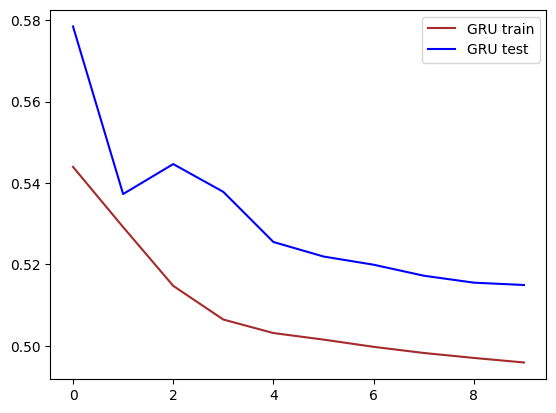

In [50]:
#dont run this cell if you are running this cell than add "validation_data=(test_X, test_y)" in model_gru.fit()
pyplot.plot(gru_history.history['loss'], label='GRU train', color='brown')
pyplot.plot(gru_history.history['val_loss'], label='GRU test', color='blue')
pyplot.legend()
pyplot.show()

In [51]:
#test_y.reshape(8086,1)
#test_y.reshape(2627,1)
#test_y=test_y[:, :1]

#train_y=test_y[:, :1]
print(test_y)

[[1.]
 [1.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [52]:
np.shape(pred_y)

(8068, 1)

In [53]:
pred_y

array([[0.23376593],
       [0.2333271 ],
       [0.23286588],
       ...,
       [0.22981825],
       [0.22964987],
       [0.22941463]], dtype=float32)

In [54]:
pred_y=np.reshape(pred_y,8068)

0.1670852696147372
0.1332645244908366
0.40876065076611423
0.340246563967563


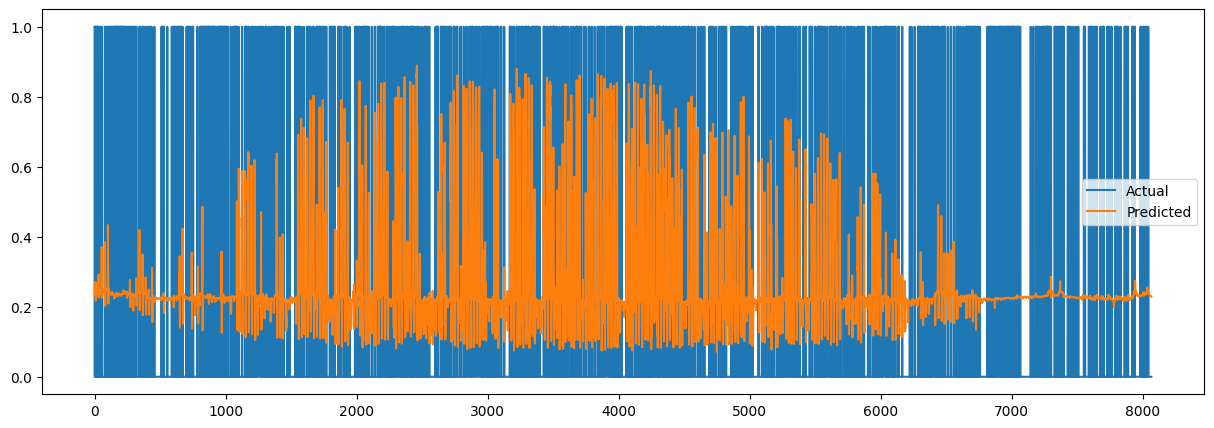

In [55]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,5)

from sklearn.metrics import *
from math import sqrt

MSE = mean_squared_error(test_y, pred_y)
R2 = r2_score(test_y, pred_y)
RMSE = sqrt(mean_squared_error(test_y, pred_y))
MAE = mean_absolute_error(test_y, pred_y)


print(MSE)
print(R2)
print(RMSE)
print(MAE)

#plotting predicted test value vs actual test value
plt.plot(test_y, label = 'Actual')
plt.plot(pred_y, label = 'Predicted')
plt.legend()
plt.show()

In [56]:
np.shape(train_X)

(32272, 3, 5)

In [57]:
np.shape(train_y)

(32272, 1)

In [58]:
np.shape(test_X)

(8068, 3, 5)

In [59]:
np.shape(test_y)

(8068, 1)

1261/1261 [==============================] - 4s 3ms/step


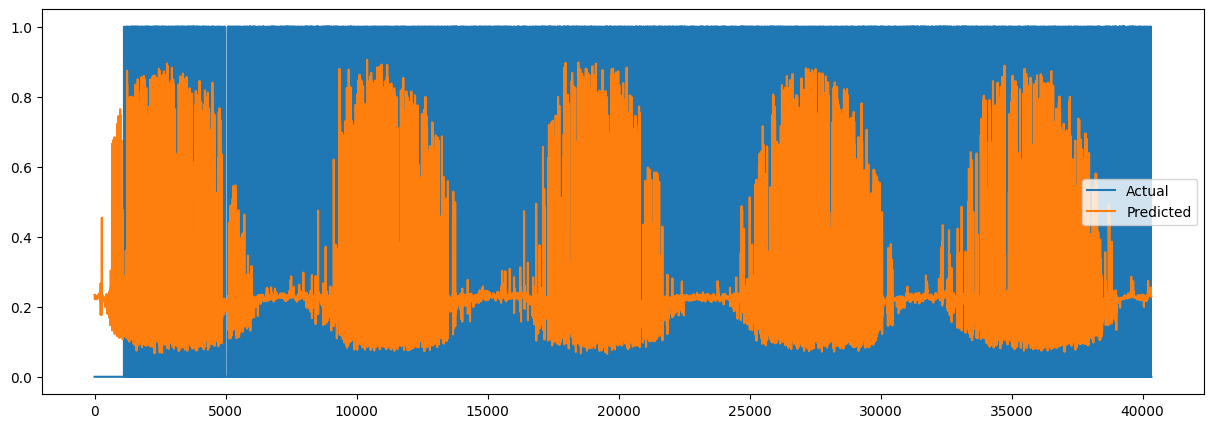

In [60]:
#visualization over full data
tra = np.concatenate([train_X,test_X])
tes = np.concatenate([train_y,test_y])
fp = model_gru.predict(tra)
plt.plot(tes, label = 'Actual')
plt.plot(fp, label = 'Predicted')
plt.legend()
plt.show()

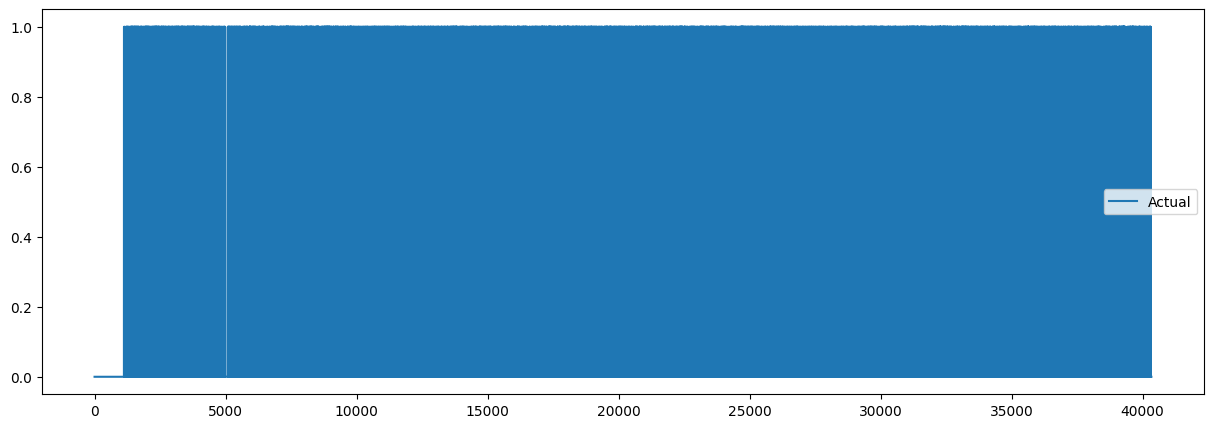

In [61]:
#over small part of data
plt.plot(tes, label = 'Actual')
#plt.plot(fp[:2000], label = 'Predicted')
plt.legend()
plt.show()

In [62]:
print(sum(tes)/len(tes))

[0.24179474]


In [63]:
#print(fp[1000:1010])
_fp = np.where(fp>0.5,1,0)
_all = sum(_fp)
_w = (_fp*tes)
print(sum(_w)/_all)
      
_all_z = sum(1-_fp)      
_w_z = (1-_fp)*(1-tes)
print(sum(_w_z)/_all_z)
print('total acc', (sum(_w)+sum(_w_z))/len(_w))

[0.7337884]
[0.79673884]
total acc [0.79216658]


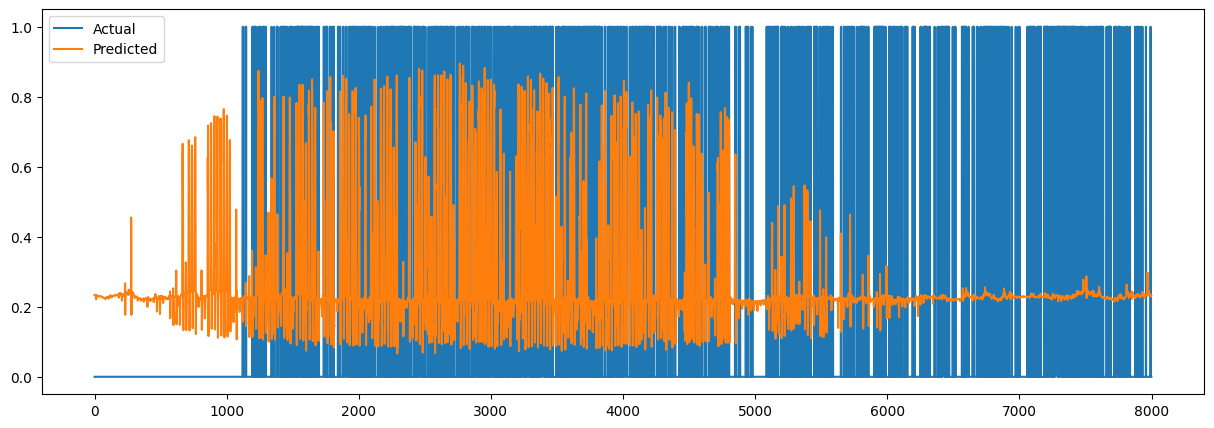

In [64]:
plt.plot(tes[:8000], label = 'Actual')
plt.plot(fp[:
            8000], label = 'Predicted')
plt.legend()
plt.show()

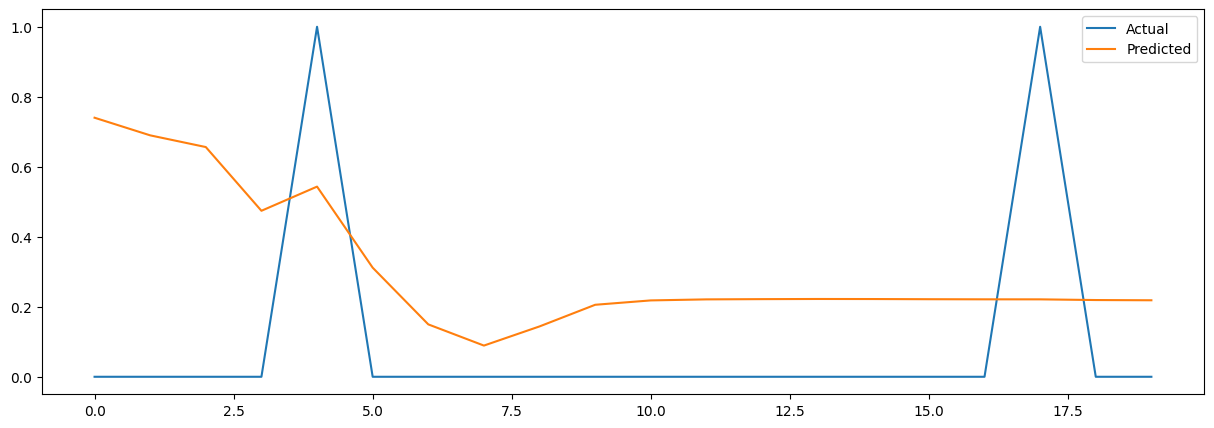

In [65]:
#over very small part of data
plt.plot(tes[2000:2020], label = 'Actual')
plt.plot(fp[2000:2020], label = 'Predicted')
plt.legend()
plt.show()

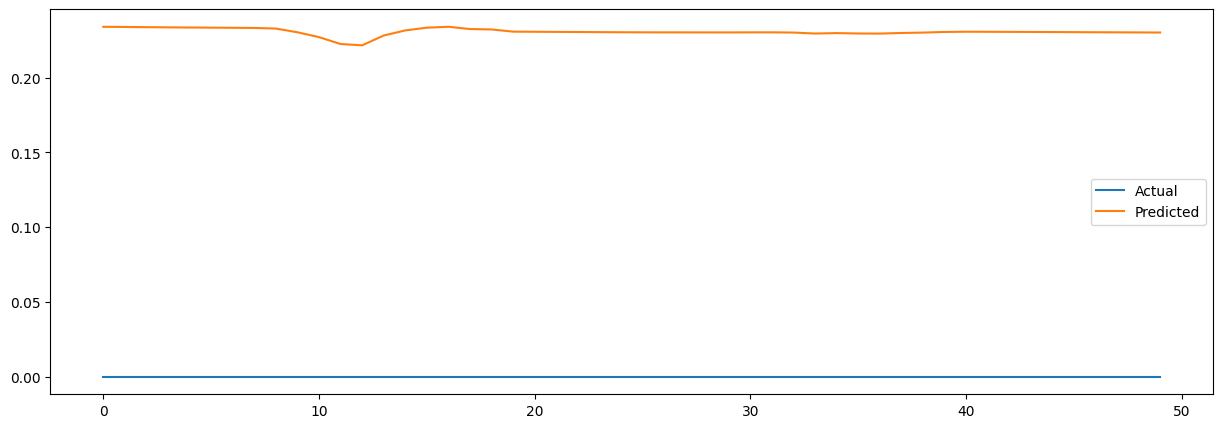

In [66]:
plt.plot(tes[:50], label = 'Actual')
plt.plot(fp[:50], label = 'Predicted')
plt.legend()
plt.show()

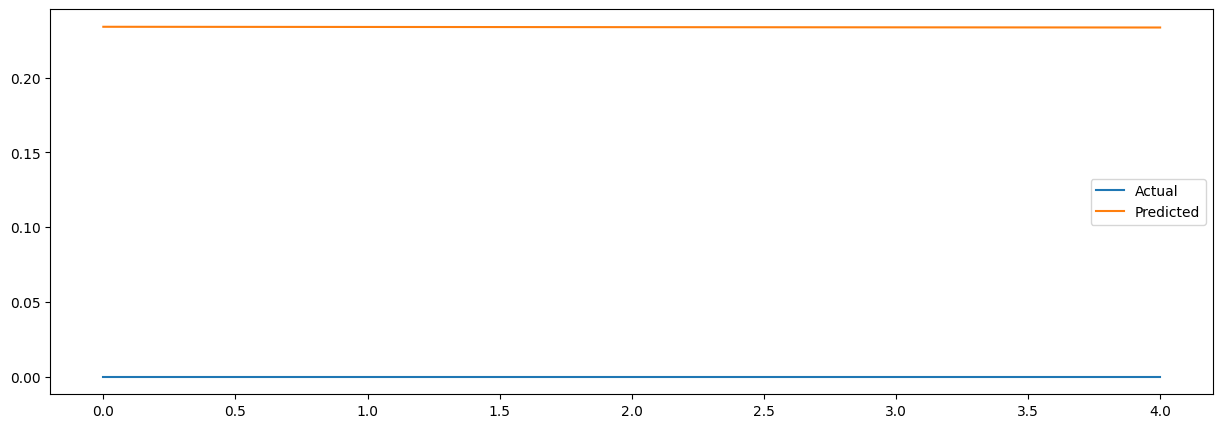

In [67]:
plt.plot(tes[:5], label = 'Actual')
plt.plot(fp[:5], label = 'Predicted')
plt.legend()
plt.show()

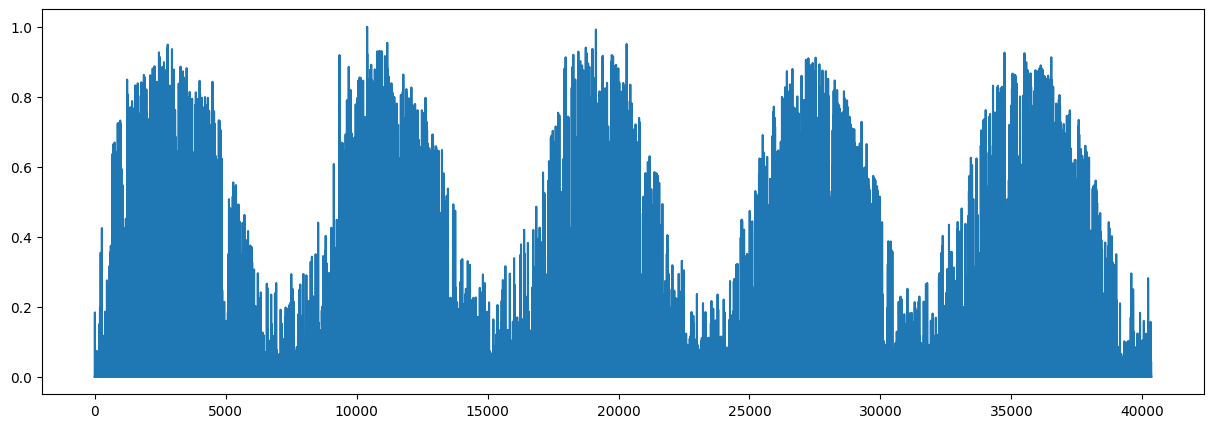

In [68]:
plt.plot(scaled[3], label = 'Actual')

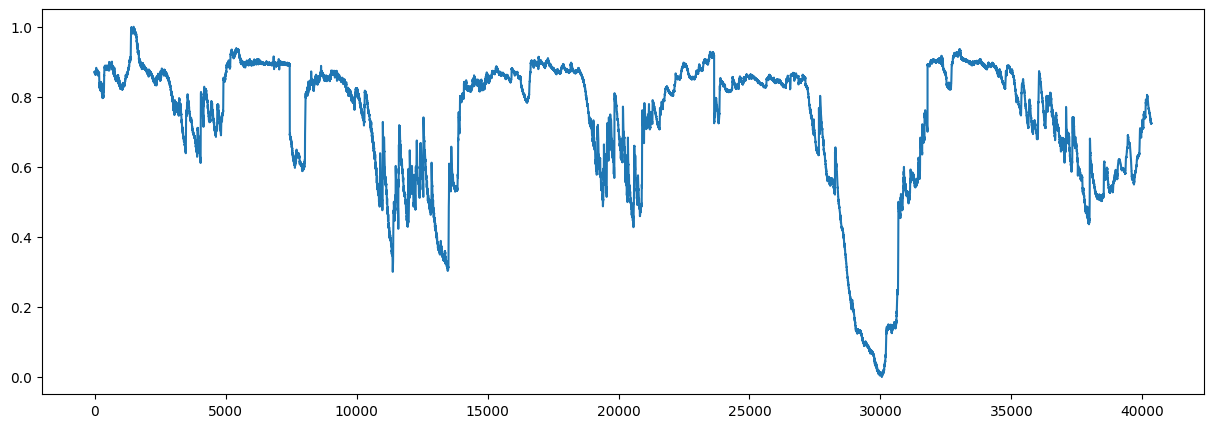

In [69]:
plt.plot(scaled[2], label = 'Actual')

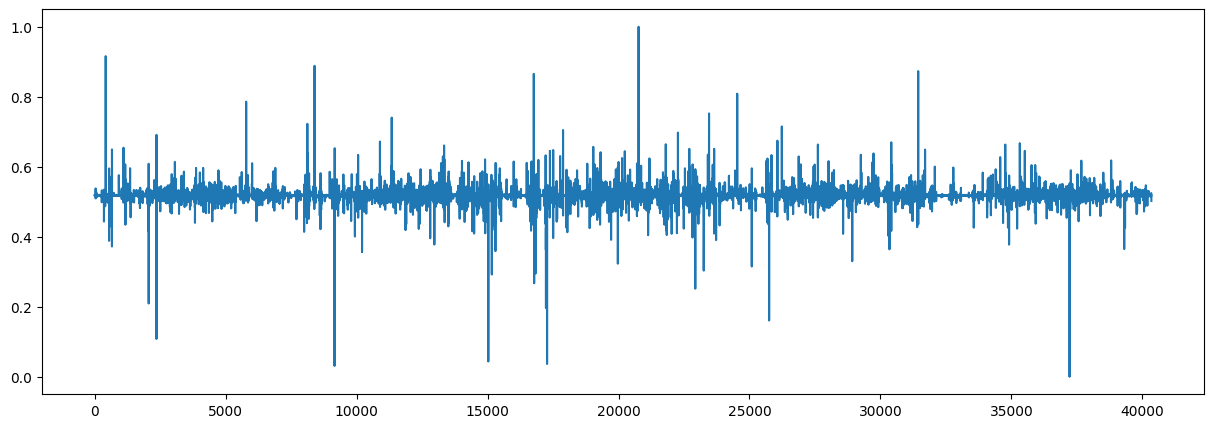

In [70]:
plt.plot(scaled[1], label = 'Actual')

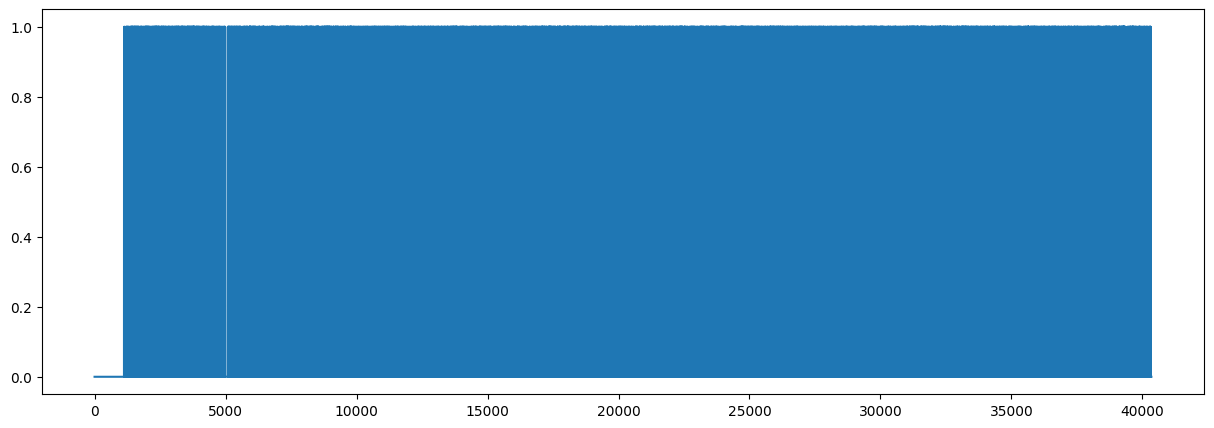

In [71]:
plt.plot(scaled[0], label = 'Actual')